# Info
Purpose:

    Load the HITRAN - API and use it to convolve the 4STARB spectra and get the convolved gas corss sections
    
Input:

    None

Output:

    Figure and save files

Keywords:

    none

Dependencies:

    - numpy
    - matpotlib
    - hapi
    - path_utils

Needed Files:
  - ?

Modification History:

    Written: Samuel LeBlanc, Santa Cruz, CA, 2022-05-13
    Modified:


# Prepare python environment

In [1]:
import numpy as np
from path_utils import getpath
import matplotlib.pyplot as plt
%matplotlib notebook
import os
import hapi

HAPI version: 1.2.2.0
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2021 are now available in HAPI code

           MIT license: Copyright 2021 HITRAN team, see more at http://hitran.org. 

           If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005

           ATTENTION: This is the core version of the HITRAN Application Programming Interface.
                      For more efficient implementation of the absorption coefficient routine, 
                      as well as for new profiles, parameters and other functional,
      

In [2]:
from tqdm.notebook import tqdm
import scipy.io as sio
import pandas as pd

In [3]:
name = '4star_data'
vv = 'v1'
fp = getpath(name)


Return path named:  4star_data /home/sam/4STAR_codes/data_folder/


In [9]:
fph = getpath('HITRAN')

Return path named:  HITRAN /scratch/rtm/HITRAN/


Identify the various trace gas to account and make cross sections

For vis spectrometer  

 - no2_220K_conv_4starb.xs
 - no2_254K_conv_4starb.xs
 - no2_298K_conv_4starb.xs
 - o3_223K_conv_4starb.xs
 - o2_1013mbar_conv_4starb.xs
 - o4_296K_conv_4starb_vis.xs
 - hcho_293K_conv_4starb.xs
 - 
 
 Water:
 - h20_1013mbar_294K_conv_4starb.xs
 - h20_902mbar_289K_conv_4starb.xs
 - h20_802mbar_285K_conv_4starb.xs
 - h20_710mbar_279K_conv_4starb.xs
 - h20_628mbar_273K_conv_4starb.xs
 - h20_554mbar_267K_conv_4starb.xs
 - h20_487mbar_261K_conv_4starb.xs
 - h20_426mbar_254K_conv_4starb.xs
 - h20_372mbar_248K_conv_4starb.xs
 - h20_324mbar_241K_conv_4starb.xs
 - h20_281mbar_235K_conv_4starb.xs

For NIR spectrometer  
 - ch4_1013mbar_conv_4starb_nir.xs
 - co2_1013mbar_conv_4starb_nir.xs
 - o4_296K_conv_4starb_nir.xs


In [5]:
Loschmidt=2.686763e19                   # molec/cm3*atm

# Load files

## Load the 4STARB wavelength and FWHM

In [6]:
s = sio.loadmat(fp+'4STARB_FWHM_combinedlinelamps_20220507.mat')

In [7]:
s.keys()

dict_keys(['__header__', '__version__', '__globals__', 'fwhm_nir', 'fwhm_vis', 'nir_nm', 'vis_nm'])

# Load the HAPI molecules and crosssections

In [8]:
wvn_2_wvl = lambda x: 1.0e4 / x
wvl_2_wvn = lambda x: 1.0e4 / x

#wvl in micron
#wvn in cm^-1

In [10]:
hapi.db_begin(fph)

Using /scratch/rtm/HITRAN/

H2O
                     Lines parsed: 229401
CO2
                     Lines parsed: 40753
O2
                     Lines parsed: 1402
O3
                     Lines parsed: 10374
CH4
                     Lines parsed: 92243
sampletab
                     Lines parsed: 3
CO
                     Lines parsed: 495
HCOH
                     Lines parsed: 40670
627f2951
                     Lines parsed: 43921
NO2
                     Lines parsed: 43921


In [243]:
hapi.describeTable('O2')

-----------------------------------------
O2 summary:
-----------------------------------------
Comment: 
Contains lines for (16O)2
 in 5882.353-33333.333 wavenumber range
Number of rows: 1402
Table type: column-fixed
-----------------------------------------
            PAR_NAME           PAR_FORMAT

            molec_id                  %2d
        local_iso_id                  %1d
                  nu               %12.6f
                  sw               %10.3E
                   a               %10.3E
           gamma_air                %5.4f
          gamma_self                %5.3f
              elower               %10.4f
               n_air                %4.2f
           delta_air                %8.6f
 global_upper_quanta                 %15s
 global_lower_quanta                 %15s
  local_upper_quanta                 %15s
  local_lower_quanta                 %15s
                ierr                  %6s
                iref                 %12s
    line_mixing_flag     

In [10]:
# get the o2-o2 cross sections
!wget https://hitran.org/data/CIA/O2-O2_2018b.cia -P $fph

--2022-05-24 18:03:27--  https://hitran.org/data/CIA/O2-O2_2018b.cia
Resolving hitran.org (hitran.org)... 131.142.195.62
Connecting to hitran.org (hitran.org)|131.142.195.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3070745 (2.9M)
Saving to: ‘/scratch/rtm/HITRAN/O2-O2_2018b.cia.1’

O2-O2_2018b.cia.1   100%[===================>]   2.93M  5.17MB/s    in 0.6s    

2022-05-24 18:03:27 (5.17 MB/s) - ‘/scratch/rtm/HITRAN/O2-O2_2018b.cia.1’ saved [3070745/3070745]



In [11]:
#get the ozone cross sections
!wget "http://joseba.mpch-mainz.mpg.de/spectral_atlas_data/cross_sections/Ozone/O3_Serdyuchenko(2014)_223K_213-1100nm(2013%20version).txt" -P $fph
!wget "http://joseba.mpch-mainz.mpg.de/spectral_atlas_data/cross_sections/Ozone/O3_Serdyuchenko(2014)_293K_213-1100nm(2013%20version).txt" -P $fph
    
fo3_223k = 'O3_Serdyuchenko(2014)_223K_213-1100nm(2013 version).txt'
fo3_293k = 'O3_Serdyuchenko(2014)_293K_213-1100nm(2013 version).txt'

# in nm

--2022-05-24 18:03:28--  http://joseba.mpch-mainz.mpg.de/spectral_atlas_data/cross_sections/Ozone/O3_Serdyuchenko(2014)_223K_213-1100nm(2013%20version).txt
Resolving joseba.mpch-mainz.mpg.de (joseba.mpch-mainz.mpg.de)... 192.67.218.181
Connecting to joseba.mpch-mainz.mpg.de (joseba.mpch-mainz.mpg.de)|192.67.218.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1873537 (1.8M) [text/plain]
Saving to: ‘/scratch/rtm/HITRAN/O3_Serdyuchenko(2014)_223K_213-1100nm(2013 version).txt.1’

O3_Serdyuchenko(201 100%[===================>]   1.79M   500KB/s    in 3.7s    

2022-05-24 18:03:33 (500 KB/s) - ‘/scratch/rtm/HITRAN/O3_Serdyuchenko(2014)_223K_213-1100nm(2013 version).txt.1’ saved [1873537/1873537]

--2022-05-24 18:03:33--  http://joseba.mpch-mainz.mpg.de/spectral_atlas_data/cross_sections/Ozone/O3_Serdyuchenko(2014)_293K_213-1100nm(2013%20version).txt
Resolving joseba.mpch-mainz.mpg.de (joseba.mpch-mainz.mpg.de)... 192.67.218.181
Connecting to joseba.mpch-mainz.mpg

In [11]:
fo3_223k = 'O3_Serdyuchenko(2014)_223K_213-1100nm(2013 version).txt'
fo3_293k = 'O3_Serdyuchenko(2014)_293K_213-1100nm(2013 version).txt'

In [9]:
# get the ozone cross sections
#!wget https://hitran.org/data/xsec/O3_293.0K-0.0Torr_28901.0-40999.0_118.xsc -P $fph
#!wget https://hitran.org/data/xsec/O3_273.0K-0.0Torr_28901.0-40999.0_118.xsc -P $fph
#!wget https://hitran.org/data/xsec/O3_253.0K-0.0Torr_28901.0-40999.0_118.xsc -P $fph
#!wget https://hitran.org/data/xsec/O3_213.0K-0.0Torr_28901.0-40999.0_118.xsc -P $fph
#!wget https://hitran.org/data/xsec/O3_193.0K-0.0Torr_28901.0-40999.0_118.xsc -P $fph
#!wget https://hitran.org/data/xsec/O3_233.0K-0.0Torr_28901.0-40999.0_118.xsc -P $fph

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/samuel/.wget-hsts'. HSTS will be disabled.
--2022-05-17 10:10:24--  https://hitran.org/data/xsec/O3_293.0K-0.0Torr_28901.0-40999.0_118.xsc
Resolving hitran.org (hitran.org)... 131.142.195.62
Connecting to hitran.org (hitran.org)|131.142.195.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 122310 (119K)
Saving to: ‘/mnt/c/Users/lebla/Research/HITRAN/O3_293.0K-0.0Torr_28901.0-40999.0_118.xsc’

O3_293.0K-0.0Torr_2 100%[===================>] 119.44K   179KB/s    in 0.7s    

2022-05-17 10:10:26 (179 KB/s) - ‘/mnt/c/Users/lebla/Research/HITRAN/O3_293.0K-0.0Torr_28901.0-40999.0_118.xsc’ saved [122310/122310]

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/samuel/.wget-hsts'. HSTS will be disabled.
--2022-05-17 10:10:26--  https://hitran.org/data/xsec/O3_273

In [12]:
# get the NO2 cross sections
#!wget https://hitran.org/data/xsec/NO2_220.0_0.0_15002.0-42002.3_00.xsc -P $fph
#!wget https://hitran.org/data/xsec/NO2_294.0_0.0_15002.0-42002.3_00.xsc -P $fph
#http://spectrolab.aeronomie.be/data/no2_294_vis.zip #for mid-vis band, low alt
#http://spectrolab.aeronomie.be/data/no2_220_vis.zip #for mid-vis band, high alt
fno2_220 = 'no2a_220K_vanDaele.xs'
fno2_298 = 'no2_298K_vanDaele.xs'
fno2_254 = 'no2_254K.xs'


In [10]:
# get the formaldehyde cross sections
#!wget https://hitran.org/data/xsec/H2CO_280.0_0.0_25919.6-33299.4_13.xsc -P $fph
#!wget https://hitran.org/data/xsec/H2CO_290.0_0.0_25919.6-33299.4_13.xsc -P $fph
#!wget https://hitran.org/data/xsec/H2CO_300.0_0.0_25919.6-33299.4_13.xsc -P $fph

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/samuel/.wget-hsts'. HSTS will be disabled.
--2022-05-17 10:10:34--  https://hitran.org/data/xsec/H2CO_280.0_0.0_25919.6-33299.4_13.xsc
Resolving hitran.org (hitran.org)... 131.142.195.62
Connecting to hitran.org (hitran.org)|131.142.195.62|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305586 (298K)
Saving to: ‘/mnt/c/Users/lebla/Research/HITRAN/H2CO_280.0_0.0_25919.6-33299.4_13.xsc’

H2CO_280.0_0.0_2591 100%[===================>] 298.42K   187KB/s    in 1.6s    

2022-05-17 10:10:36 (187 KB/s) - ‘/mnt/c/Users/lebla/Research/HITRAN/H2CO_280.0_0.0_25919.6-33299.4_13.xsc’ saved [305586/305586]

Will not apply HSTS. The HSTS database must be a regular and non-world-writable file.
ERROR: could not open HSTS store at '/home/samuel/.wget-hsts'. HSTS will be disabled.
--2022-05-17 10:10:36--  https://hitran.org/data/xsec/H2CO_290.0_0.0_259

In [14]:
# get the cross section from the Max-Planck Mainz spectral library (updated since Bogumil/Mentel with higher by about 7%)
# http://satellite.mpic.de/spectral_atlas/cross_sections/Organics%20(carbonyls)/Aldehydes(aliphatic)/CH2O_ChanceOrphal(2011)_293.15K_300-360nm(rec).txt
!wget "http://joseba.mpch-mainz.mpg.de/spectral_atlas_data/cross_sections/Organics%20(carbonyls)/Aldehydes(aliphatic)/CH2O_ChanceOrphal(2011)_293.15K_300-360nm(rec).txt" -P $fph

--2022-05-24 18:04:30--  http://joseba.mpch-mainz.mpg.de/spectral_atlas_data/cross_sections/Organics%20(carbonyls)/Aldehydes(aliphatic)/CH2O_ChanceOrphal(2011)_293.15K_300-360nm(rec).txt
Resolving joseba.mpch-mainz.mpg.de (joseba.mpch-mainz.mpg.de)... 192.67.218.181
Connecting to joseba.mpch-mainz.mpg.de (joseba.mpch-mainz.mpg.de)|192.67.218.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 225382 (220K) [text/plain]
Saving to: ‘/scratch/rtm/HITRAN/CH2O_ChanceOrphal(2011)_293.15K_300-360nm(rec).txt’

CH2O_ChanceOrphal(2 100%[===================>] 220.10K   298KB/s    in 0.7s    

2022-05-24 18:04:31 (298 KB/s) - ‘/scratch/rtm/HITRAN/CH2O_ChanceOrphal(2011)_293.15K_300-360nm(rec).txt’ saved [225382/225382]



In [41]:
#Bro
# From The MPI-Mainz UV/VIS Spectral Atlas of Gaseous Molecules of Atmospheric Interest
# S.P. Sander, J. Abbatt, J. R. Barker, J. B. Burkholder, R. R. Friedl, D. M. Golden, R. E. Huie, C. E. Kolb, M. J. Kurylo, G. K. Moortgat, V. L. Orkin and P. H. Wine, "Chemical Kinetics and Photochemical Data for Use in Atmospheric Studies, Evaluation Number 17", JPL Publication 10-6, Jet Propulsion Laboratory, Pasadena, 2011; http://jpldataeval.jpl.nasa.gov/
!wget "https://uv-vis-spectral-atlas-mainz.org/uvvis_data/cross_sections/Halogen%20oxides/Br%20oxides/BrO_JPL-2010(2011)_298K_286.5-385.0nm(0.5nm,rec).txt" -P $fph
fbro_298 = 'BrO_JPL-2010(2011)_298K_286.5-385.0nm(0.5nm,rec).txt'

--2022-10-26 16:24:53--  https://uv-vis-spectral-atlas-mainz.org/uvvis_data/cross_sections/Halogen%20oxides/Br%20oxides/BrO_JPL-2010(2011)_298K_286.5-385.0nm(0.5nm,rec).txt
Resolving uv-vis-spectral-atlas-mainz.org (uv-vis-spectral-atlas-mainz.org)... 134.76.24.82
Connecting to uv-vis-spectral-atlas-mainz.org (uv-vis-spectral-atlas-mainz.org)|134.76.24.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3366 (3.3K) [text/plain]
Saving to: ‘/scratch/rtm/HITRAN/BrO_JPL-2010(2011)_298K_286.5-385.0nm(0.5nm,rec).txt.1’

BrO_JPL-2010(2011)_ 100%[===================>]   3.29K  --.-KB/s    in 0s      

2022-10-26 16:24:54 (84.9 MB/s) - ‘/scratch/rtm/HITRAN/BrO_JPL-2010(2011)_298K_286.5-385.0nm(0.5nm,rec).txt.1’ saved [3366/3366]



In [15]:
!ls $fph

 627f2951.data
 627f2951.header
'CH2O_ChanceOrphal(2011)_293.15K_300-360nm(rec).txt'
 CH4.data
 CH4.header
 CO2.data
 CO2.header
 CO.data
 CO.header
 H2CO_280.0_0.0_25919.6-33299.4_13.xsc
 H2CO_290.0_0.0_25919.6-33299.4_13.xsc
 H2CO_300.0_0.0_25919.6-33299.4_13.xsc
 H2O.data
 H2O.header
 HCOH.data
 HCOH.header
 HCOH.par
 hitran_atm_trace_gases_20220513.mat
 NO2_220.0_0.0_15002.0-42002.3_00.xsc
 NO2_294.0_0.0_15002.0-42002.3_00.xsc
 NO2.data
 NO2.header
 NO2.par
 O2.data
 O2.header
 O2-O2_2018b.cia
 O2-O2_2018b.cia.1
 O3_193.0K-0.0Torr_28901.0-40999.0_118.xsc
 O3_213.0K-0.0Torr_28901.0-40999.0_118.xsc
 O3_233.0K-0.0Torr_28901.0-40999.0_118.xsc
 O3_253.0K-0.0Torr_28901.0-40999.0_118.xsc
 O3_273.0K-0.0Torr_28901.0-40999.0_118.xsc
 O3_293.0K-0.0Torr_28901.0-40999.0_118.xsc
 O3.data
 O3.header
'O3_Serdyuchenko(2014)_223K_213-1100nm(2013 version).txt'
'O3_Serdyuchenko(2014)_223K_213-1100nm(2013 version).txt.1'
'O3_Serdyuchenko(2014)_293K_213-1100nm(2013 version).txt'
'O3_Serdyuchenko(2014)_2

In [16]:
hapi.db_commit()

sampletab
H2O
CO2
O2
O3
CH4
CO
HCOH
627f2951
NO2


cs.no2_vis_220K_interp = interp1(no2_vis_220.data(:,1),no2_vis_220.data(:,2),cs.wln_4starb,'nearest','extrap')*Loschmidt;  
cs.no2_vis_254K_interp = interp1(no2_vis_254.data(:,1),no2_vis_254.data(:,2),cs.wln_4starb,'nearest','extrap')*Loschmidt;  
cs.no2_vis_298K_interp = interp1(no2_vis_298.data(:,1),no2_vis_298.data(:,2),cs.wln_4starb,'nearest','extrap')*Loschmidt;  
cs.o3_vis_223K_interp = interp1(o3_vis.data(:,1),o3_vis.data(:,2),cs.wln_4starb,'nearest','extrap')*Loschmidt;  
cs.o4_vis_296K_interp = interp1(o4_vis.data(:,1),o4_vis.data(:,2),cs.wln_4starb,'nearest','extrap');  
cs.o2_vis_1013mbar_interp = interp1(o2_vis.data(:,1),o2_vis.data(:,2),cs.wln_4starb,'nearest','extrap');  
cs.hcho_vis_293K_interp = interp1(hcho_vis.data(:,1),hcho_vis.data(:,2),cs.wln_4starb,'nearest','extrap')*Loschmidt;  
cs.h2o_vis_1013mbar_294K_interp = interp1(h2o_vis_1013mbar_294K.data(:,1),h2o_vis_1013mbar_294K.data(:,2),cs.wln_4starb,'nearest','extrap');  
cs.h2o_vis_0902mbar_289K_interp = interp1(h2o_vis_0902mbar_289K.data(:,1),h2o_vis_0902mbar_289K.data(:,2),cs.wln_4starb,'nearest','extrap');  
cs.h2o_vis_0802mbar_285K_interp = interp1(h2o_vis_0802mbar_285K.data(:,1),h2o_vis_0802mbar_285K.data(:,2),cs.wln_4starb,'nearest','extrap');  
cs.h2o_vis_0710mbar_279K_interp = interp1(h2o_vis_0710mbar_279K.data(:,1),h2o_vis_0710mbar_279K.data(:,2),cs.wln_4starb,'nearest','extrap');  
cs.h2o_vis_0628mbar_273K_interp = interp1(h2o_vis_0628mbar_273K.data(:,1),h2o_vis_0628mbar_273K.data(:,2),cs.wln_4starb,'nearest','extrap');  
cs.h2o_vis_0554mbar_267K_interp = interp1(h2o_vis_0554mbar_267K.data(:,1),h2o_vis_0554mbar_267K.data(:,2),cs.wln_4starb,'nearest','extrap');  
cs.h2o_vis_0487mbar_261K_interp = interp1(h2o_vis_0487mbar_261K.data(:,1),h2o_vis_0487mbar_261K.data(:,2),cs.wln_4starb,'nearest','extrap');  
cs.h2o_vis_0426mbar_254K_interp = interp1(h2o_vis_0426mbar_254K.data(:,1),h2o_vis_0426mbar_254K.data(:,2),cs.wln_4starb,'nearest','extrap');  
cs.h2o_vis_0372mbar_248K_interp = interp1(h2o_vis_0372mbar_248K.data(:,1),h2o_vis_0372mbar_248K.data(:,2),cs.wln_4starb,'nearest','extrap');  
cs.h2o_vis_0324mbar_241K_interp = interp1(h2o_vis_0324mbar_241K.data(:,1),h2o_vis_0324mbar_241K.data(:,2),cs.wln_4starb,'nearest','extrap');  
cs.h2o_vis_0281mbar_235K_interp = interp1(h2o_vis_0281mbar_235K.data(:,1),h2o_vis_0281mbar_235K.data(:,2),cs.wln_4starb,'nearest','extrap');  

% interp nir  
cs.ch4_nir_1013mbar_interp = interp1(ch4_nir.data(:,1),ch4_nir.data(:,2),cs.wln_4starb,'nearest','extrap');  
cs.co2_nir_1013mbar_interp = interp1(co2_nir.data(:,1),co2_nir.data(:,2),cs.wln_4starb,'nearest','extrap');  
cs.o4_nir_296K_interp      = interp1(o4_nir.data(:,1),o4_nir.data(:,2),cs.wln_4starb,'nearest','extrap');  
cs.o4all = cs.o4_vis_296K_interp + cs.o4_nir_296K_interp;  

# Calculate the absorption coefficients for air with different pressures and temps

In [13]:
gases = {'no2_vis_220K':{'SourceTables':'NO2','Diluent':{'air':1.0},'Environment':{'T':220.,'p':0.0286}},
         'no2_vis_254K':{'SourceTables':'NO2','Diluent':{'air':1.0},'Environment':{'T':254.,'p':540.0/1013.0}},
         'no2_vis_298K':{'SourceTables':'NO2','Diluent':{'air':1.0},'Environment':{'T':298.,'p':0.99}},
         'o3_vis_223K':{'SourceTables':'O3','Diluent':{'air':1.0},'Environment':{'T':223.,'p':17.43/1013.0}},
         'o3_vis_293K':{'SourceTables':'O3','Diluent':{'air':1.0},'Environment':{'T':293.,'p':1.0}},
         'o4_vis_296K':{'SourceTables':'O2','Diluent':{'air':1.0},'Environment':{'T':296.,'p':1.0}},
         'o2_vis_1013mbar':{'SourceTables':'O2','Diluent':{'air':1.0},'Environment':{'T':293.,'p':1.0}},
         'hcho_vis_293K':{'SourceTables':'HCOH','Diluent':{'air':1.0},'Environment':{'T':293.,'p':1.0}},
         'h2o_vis_1013mbar_294K':{'SourceTables':'H2O','Diluent':{'air':1.0},'Environment':{'T':294.,'p':1.0}},
         'h2o_vis_0902mbar_289K':{'SourceTables':'H2O','Diluent':{'air':1.0},'Environment':{'T':289.,'p':902.0/1013.0}},
         'h2o_vis_0802mbar_285K':{'SourceTables':'H2O','Diluent':{'air':1.0},'Environment':{'T':285.,'p':802.0/1013.0}},
         'h2o_vis_0710mbar_279K':{'SourceTables':'H2O','Diluent':{'air':1.0},'Environment':{'T':279.,'p':710.0/1013.0}},
         'h2o_vis_0628mbar_273K':{'SourceTables':'H2O','Diluent':{'air':1.0},'Environment':{'T':273.,'p':628.0/1013.0}},
         'h2o_vis_0554mbar_267K':{'SourceTables':'H2O','Diluent':{'air':1.0},'Environment':{'T':267.,'p':554.0/1013.0}},
         'h2o_vis_0487mbar_261K':{'SourceTables':'H2O','Diluent':{'air':1.0},'Environment':{'T':261.,'p':487.0/1013.0}},
         'h2o_vis_0426mbar_254K':{'SourceTables':'H2O','Diluent':{'air':1.0},'Environment':{'T':254.,'p':426.0/1013.0}},
         'h2o_vis_0372mbar_248K':{'SourceTables':'H2O','Diluent':{'air':1.0},'Environment':{'T':248.,'p':372.0/1013.0}},
         'h2o_vis_0324mbar_241K':{'SourceTables':'H2O','Diluent':{'air':1.0},'Environment':{'T':241.,'p':324.0/1013.0}},
         'h2o_vis_0281mbar_235K':{'SourceTables':'H2O','Diluent':{'air':1.0},'Environment':{'T':235.,'p':281.0/1013.0}},
         'h2o_nir_1013mbar_294K':{'SourceTables':'H2O','Diluent':{'air':1.0},'Environment':{'T':294.,'p':1.0}},
         'h2o_nir_0902mbar_289K':{'SourceTables':'H2O','Diluent':{'air':1.0},'Environment':{'T':289.,'p':902.0/1013.0}},
         'h2o_nir_0802mbar_285K':{'SourceTables':'H2O','Diluent':{'air':1.0},'Environment':{'T':285.,'p':802.0/1013.0}},
         'h2o_nir_0710mbar_279K':{'SourceTables':'H2O','Diluent':{'air':1.0},'Environment':{'T':279.,'p':710.0/1013.0}},
         'h2o_nir_0628mbar_273K':{'SourceTables':'H2O','Diluent':{'air':1.0},'Environment':{'T':273.,'p':628.0/1013.0}},
         'h2o_nir_0554mbar_267K':{'SourceTables':'H2O','Diluent':{'air':1.0},'Environment':{'T':267.,'p':554.0/1013.0}},
         'h2o_nir_0487mbar_261K':{'SourceTables':'H2O','Diluent':{'air':1.0},'Environment':{'T':261.,'p':487.0/1013.0}},
         'h2o_nir_0426mbar_254K':{'SourceTables':'H2O','Diluent':{'air':1.0},'Environment':{'T':254.,'p':426.0/1013.0}},
         'h2o_nir_0372mbar_248K':{'SourceTables':'H2O','Diluent':{'air':1.0},'Environment':{'T':248.,'p':372.0/1013.0}},
         'h2o_nir_0324mbar_241K':{'SourceTables':'H2O','Diluent':{'air':1.0},'Environment':{'T':241.,'p':324.0/1013.0}},
         'h2o_nir_0281mbar_235K':{'SourceTables':'H2O','Diluent':{'air':1.0},'Environment':{'T':235.,'p':281.0/1013.0}},
         'ch4_nir_1013mbar':{'SourceTables':'CH4','Diluent':{'air':1.0},'Environment':{'T':293.,'p':0.95}},
         'co2_nir_1013mbar':{'SourceTables':'CO2','Diluent':{'air':1.0},'Environment':{'T':293.,'p':0.95}},
         'o4_nir_296K':{'SourceTables':'O2','Diluent':{'air':1.0},'Environment':{'T':296.,'p':1.0}}}




In [14]:
wvn_2_wvl(28901)

0.34600878862323103

In [47]:
use_measured_xs = {'no2_vis_220K':{'fname':fno2_220,'skip_header':7},
                   'no2_vis_254K':{'fname':fno2_254},
                   'no2_vis_298K':{'fname':fno2_298,'skip_header':7},
                   'o3_vis_223K':{'fname':fo3_223k},
                   'o3_vis_293K':{'fname':fo3_293k},
                   'o4_vis_296K':{'fname':'O2-O2_2018b.cia','skip_header':1,'nu':True},
                   'o4_nir_296K':{'fname':'O2-O2_2018b.cia','skip_header':1,'nu':True},
                   'hcoh_vis_293K':{'fname':'CH2O_ChanceOrphal(2011)_293.15K_300-360nm(rec).txt'},
                   'h2o_vis_1013mbar_273K':{'fname':'H2O_1013mbar273K_vis.xs','skip_header':12},
                   'h2o_nir_1013mbar_273K':{'fname':'H2O_1013mbar273K_nir.xs','skip_header':12},
                   'bro_298K':{'fname':fbro_298}}

In [43]:
for k in list(gases.keys()):
    if 'nu' in gases[k].keys(): continue
    print('doing: '+k)
    gases[k]['nu'],gases[k]['coef'] = hapi.absorptionCoefficient_Voigt(**gases[k],
                                                                       HITRAN_units=False,WavenumberRange=[5881.,30303.])

doing: o2_vis_1013mbar
{'air': 1.0}
1.545994 seconds elapsed for abscoef; nlines = 1402
doing: h2o_vis_1013mbar_294K
{'air': 1.0}


KeyboardInterrupt: 

### Save to file

In [268]:
fph

'/scratch/rtm/HITRAN/'

In [276]:
sio.savemat(fph+'hitran_atm_trace_gases_20220513.mat',gases)

### Load from file

In [14]:
gases = sio.loadmat(fph+'hitran_atm_trace_gases_20220513.mat')

In [15]:
ggas = {}
for k in list(gases.keys()):
    print(k,type(gases[k]))
    if '__' in k: continue
    name = gases[k][0,0].dtype.names
    ggas[k] = {}
    for n in name:
        if 'Diluent' in n or 'Environment' in n:
            ggas[k][n] = {}
            for nn in gases[k][0,0][n][0,0].dtype.names:
                ggas[k][n][nn] = gases[k][0,0][n][0,0][nn].flatten()
        else:
            ggas[k][n] = gases[k][0,0][n]

__header__ <class 'bytes'>
__version__ <class 'str'>
__globals__ <class 'list'>
no2_vis_220K <class 'numpy.ndarray'>
no2_vis_254K <class 'numpy.ndarray'>
no2_vis_298K <class 'numpy.ndarray'>
o3_vis_223K <class 'numpy.ndarray'>
o4_vis_296K <class 'numpy.ndarray'>
o2_vis_1013mbar <class 'numpy.ndarray'>
hcho_vis_293K <class 'numpy.ndarray'>
h2o_vis_1013mbar_294K <class 'numpy.ndarray'>
h2o_vis_0902mbar_289K <class 'numpy.ndarray'>
h2o_vis_0802mbar_285K <class 'numpy.ndarray'>
h2o_vis_0710mbar_279K <class 'numpy.ndarray'>
h2o_vis_0628mbar_273K <class 'numpy.ndarray'>
h2o_vis_0554mbar_267K <class 'numpy.ndarray'>
h2o_vis_0487mbar_261K <class 'numpy.ndarray'>
h2o_vis_0426mbar_254K <class 'numpy.ndarray'>
h2o_vis_0372mbar_248K <class 'numpy.ndarray'>
h2o_vis_0324mbar_241K <class 'numpy.ndarray'>
h2o_vis_0281mbar_235K <class 'numpy.ndarray'>
ch4_nir_1013mbar <class 'numpy.ndarray'>
co2_nir_1013mbar <class 'numpy.ndarray'>
o4_nir_296K <class 'numpy.ndarray'>


In [16]:
gases = ggas

In [17]:
gases.keys()

dict_keys(['no2_vis_220K', 'no2_vis_254K', 'no2_vis_298K', 'o3_vis_223K', 'o4_vis_296K', 'o2_vis_1013mbar', 'hcho_vis_293K', 'h2o_vis_1013mbar_294K', 'h2o_vis_0902mbar_289K', 'h2o_vis_0802mbar_285K', 'h2o_vis_0710mbar_279K', 'h2o_vis_0628mbar_273K', 'h2o_vis_0554mbar_267K', 'h2o_vis_0487mbar_261K', 'h2o_vis_0426mbar_254K', 'h2o_vis_0372mbar_248K', 'h2o_vis_0324mbar_241K', 'h2o_vis_0281mbar_235K', 'ch4_nir_1013mbar', 'co2_nir_1013mbar', 'o4_nir_296K'])

## Load the xs files for measured spectra

In [16]:
wvn_2_wvl(8491.000)

1.177717583323519

In [48]:
for k in list(use_measured_xs.keys()):
    print(k)
    if not k in list(gases.keys()):
        gases[k] = {}
    if not 'O2-O2_2018b.cia' in use_measured_xs[k]['fname']:
        h = np.genfromtxt(fph+use_measured_xs[k]['fname'],skip_header=use_measured_xs[k].get('skip_header',0))
        if use_measured_xs[k].get('nu',False):
            gases[k]['wvl'] = wvn_2_wvl(h[:,0])*1000.0
            gases[k]['nu'] = h[:,0]
        else:
            gases[k]['wvl'] = h[:,0]
            gases[k]['nu'] = wvl_2_wvn(h[:,0]/1000.0)
        gases[k]['coef'] = h[:,1]
    else:
        q = pd.read_csv(fph+use_measured_xs[k]['fname'],delim_whitespace=True)
        # for O2-O2, subset file for only those with Temp at 293-296
        gases[k]['nu'] = []
        gases[k]['coef'] = []
        for i in q['4002'][(q['193.4']>290.0) & (q['193.4']<300.0)].index:
            gases[k]['nu'].append(q['O2-O2'][i+1:i+int(q['4002'][i])].astype(float).to_numpy())
            gases[k]['coef'].append(q['1150.000'][i+1:i+int(q['4002'][i])].astype(float).to_numpy())
        gases[k]['nu'] = np.concatenate(gases[k]['nu'])
        gases[k]['coef'] = np.concatenate(gases[k]['coef'])
        gases[k]['wvl'] = wvn_2_wvl(gases[k]['nu'])*1000.0  
    

no2_vis_220K
no2_vis_254K
no2_vis_298K
o3_vis_223K
o3_vis_293K
o4_vis_296K
o4_nir_296K


/home/sam/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (0,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/home/sam/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: DtypeWarning: Columns (0,7,8,9,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


hcoh_vis_293K
h2o_vis_1013mbar_273K
h2o_nir_1013mbar_273K
bro_298K


### Convert to coefficient units [/m]

In [49]:
gases['no2_vis_254K']['coef'] = gases['no2_vis_254K']['coef'] * Loschmidt

gases['no2_vis_220K']['coef'] = gases['no2_vis_220K']['coef'] * Loschmidt

gases['no2_vis_298K']['coef'] = gases['no2_vis_298K']['coef'] * Loschmidt

gases['o3_vis_293K']['coef'] = gases['o3_vis_293K']['coef'] * Loschmidt

gases['o3_vis_223K']['coef'] = gases['o3_vis_223K']['coef'] * Loschmidt

gases['hcoh_vis_293K']['coef'] = gases['hcoh_vis_293K']['coef'] * Loschmidt

gases['bro_298K']['coef'] = gases['bro_298K']['coef'] * Loschmidt

gases['o4_nir_296K']['coef'] = gases['o4_nir_296K']['coef'] * Loschmidt * Loschmidt

gases['o4_vis_296K']['coef'] = gases['o4_vis_296K']['coef'] * Loschmidt * Loschmidt

gases['h2o_vis_1013mbar_273K']['coef'] = gases['h2o_vis_1013mbar_273K']['coef'] * Loschmidt

gases['h2o_nir_1013mbar_273K']['coef'] = gases['h2o_nir_1013mbar_273K']['coef'] * Loschmidt

## Plot the absorption lines

<IPython.core.display.Javascript object>


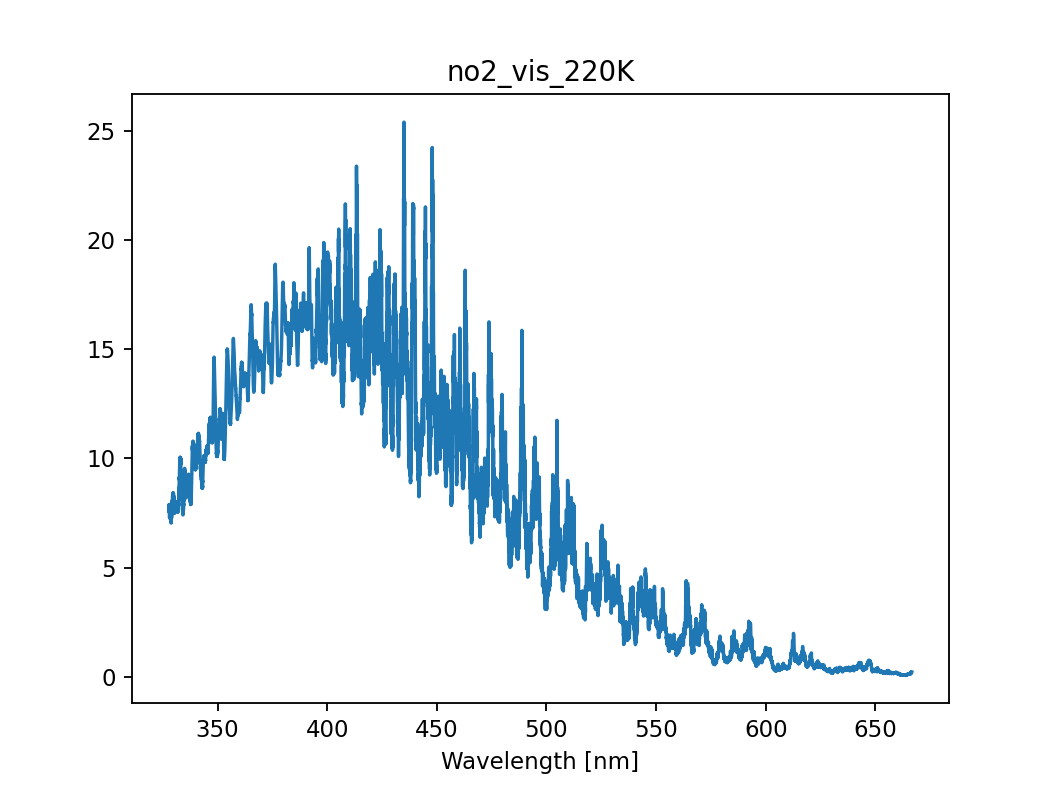

<IPython.core.display.Javascript object>


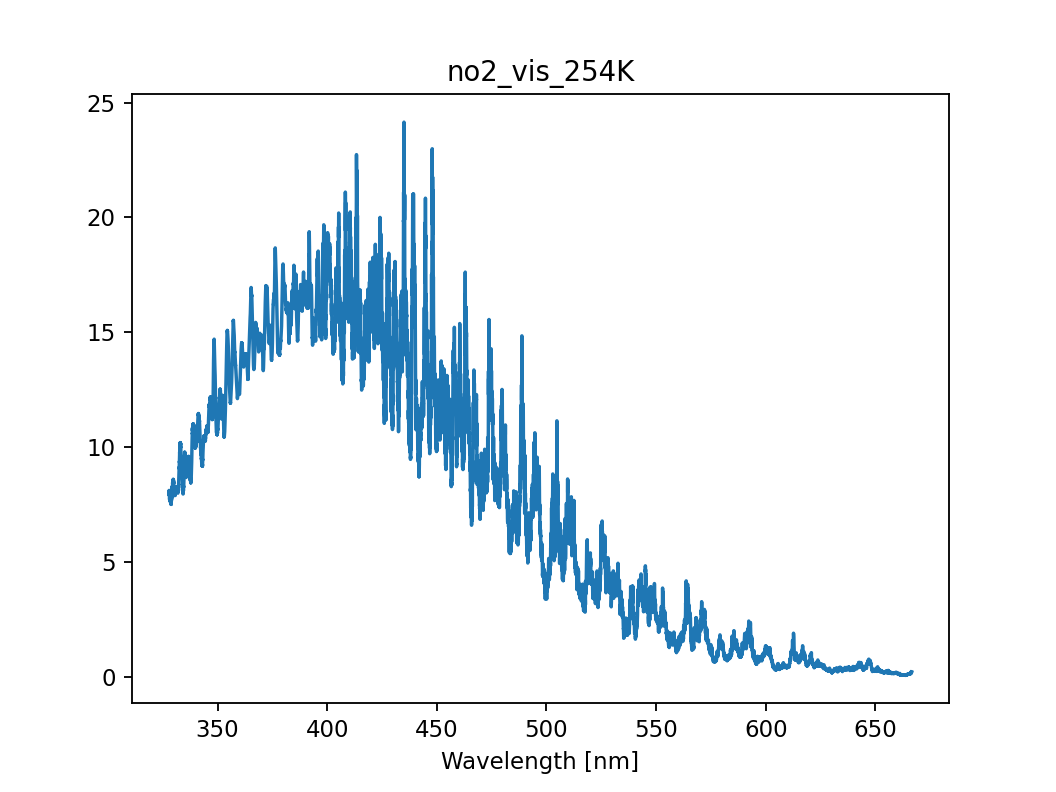

<IPython.core.display.Javascript object>


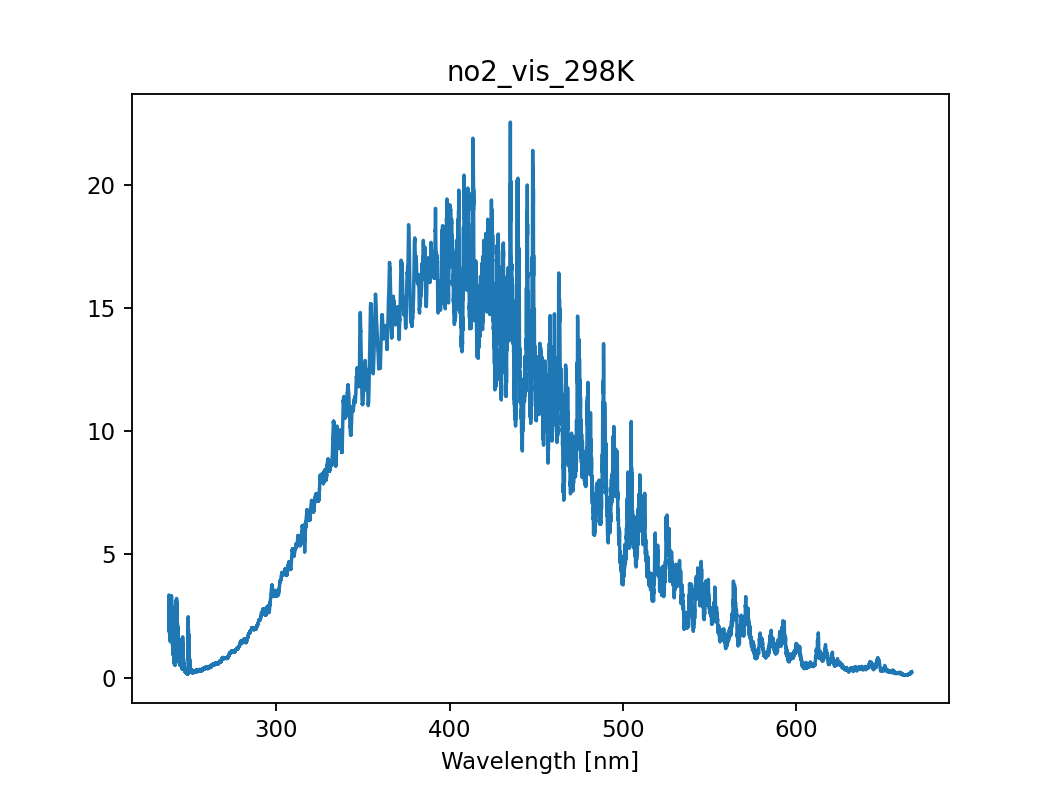

<IPython.core.display.Javascript object>


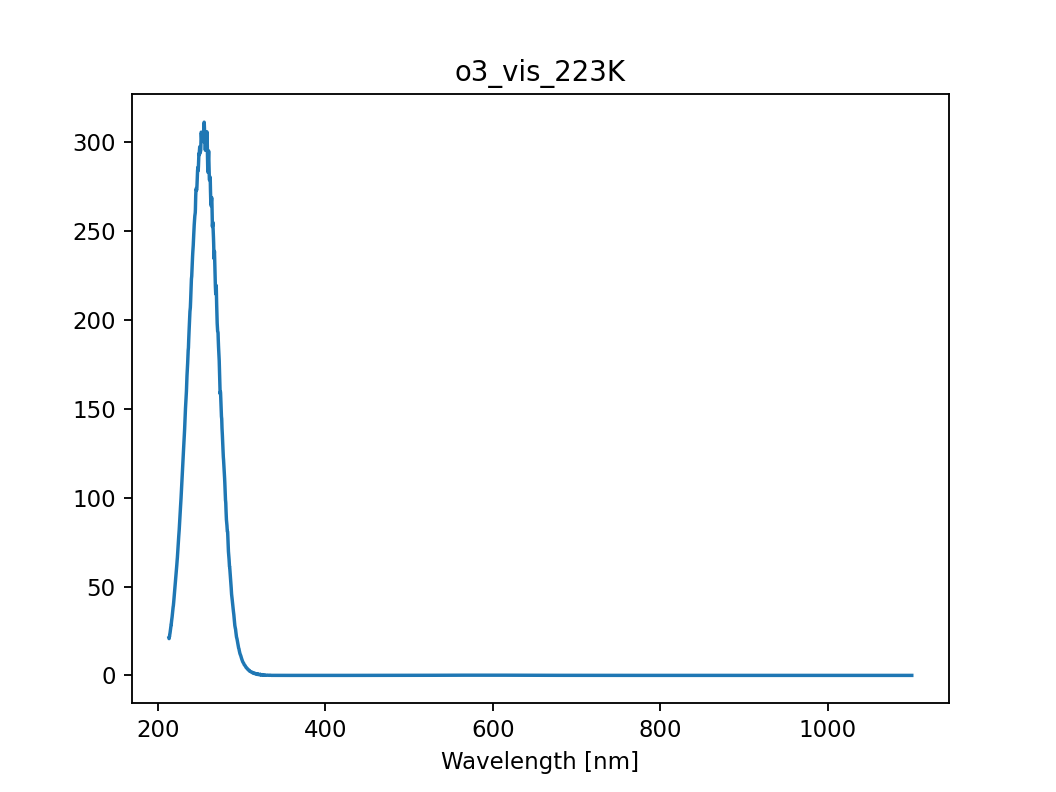

<IPython.core.display.Javascript object>


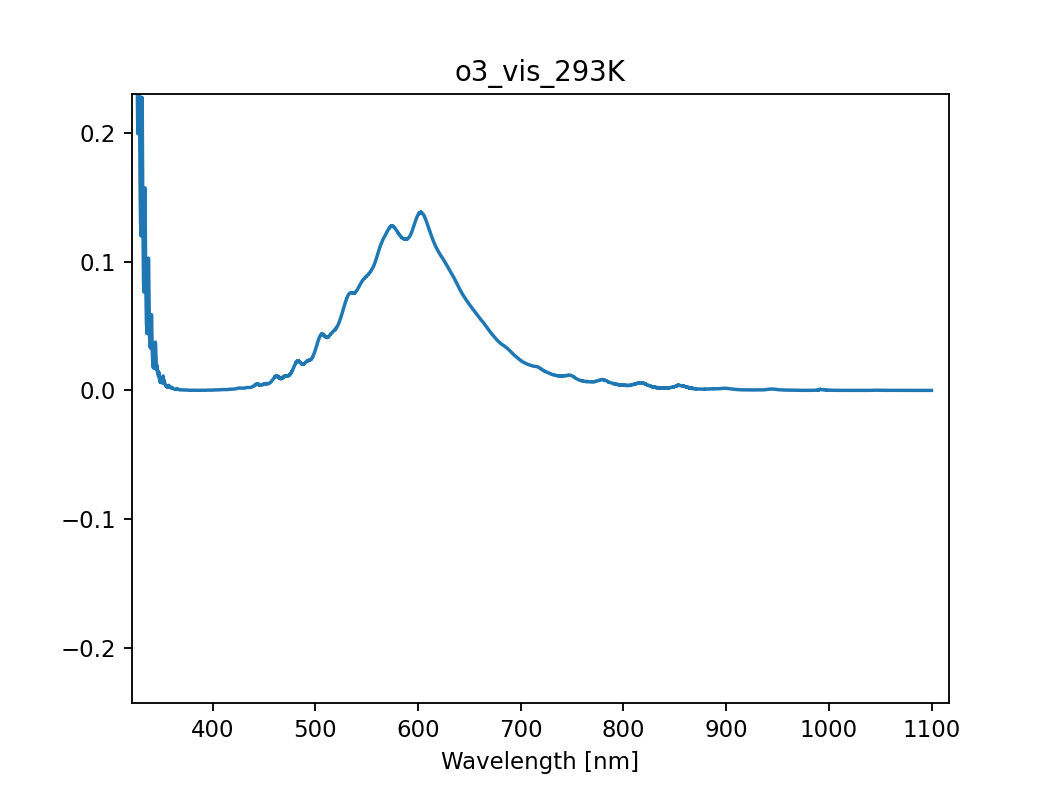

<IPython.core.display.Javascript object>


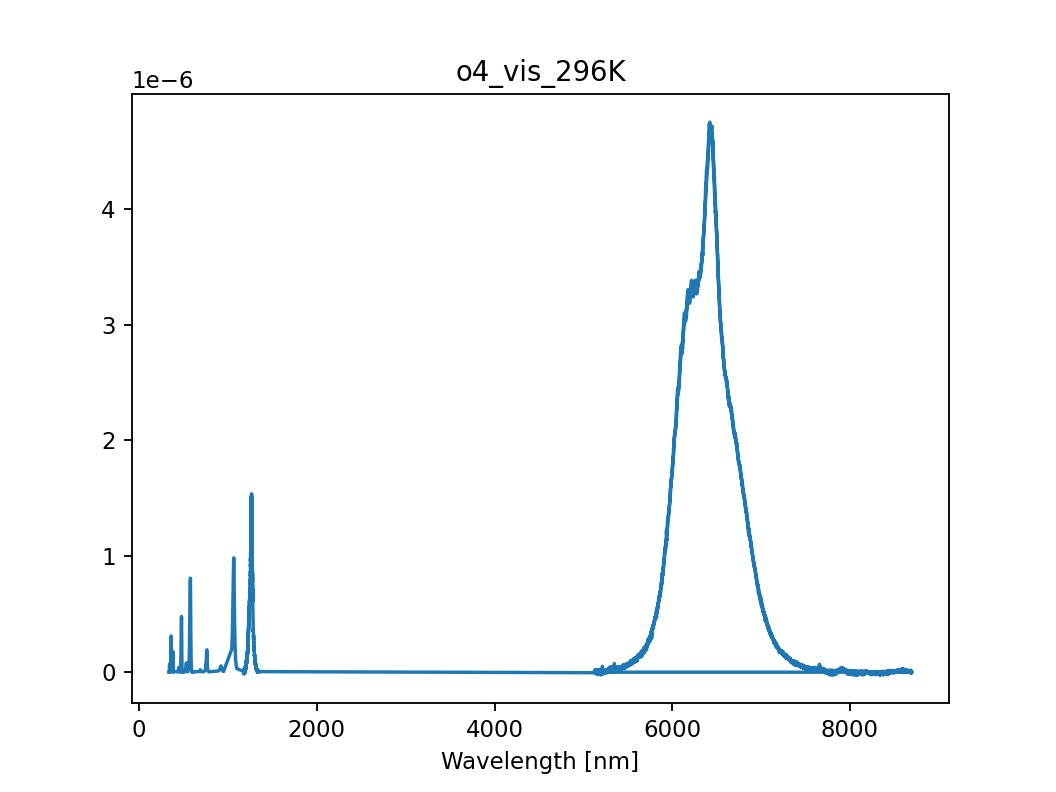

<IPython.core.display.Javascript object>


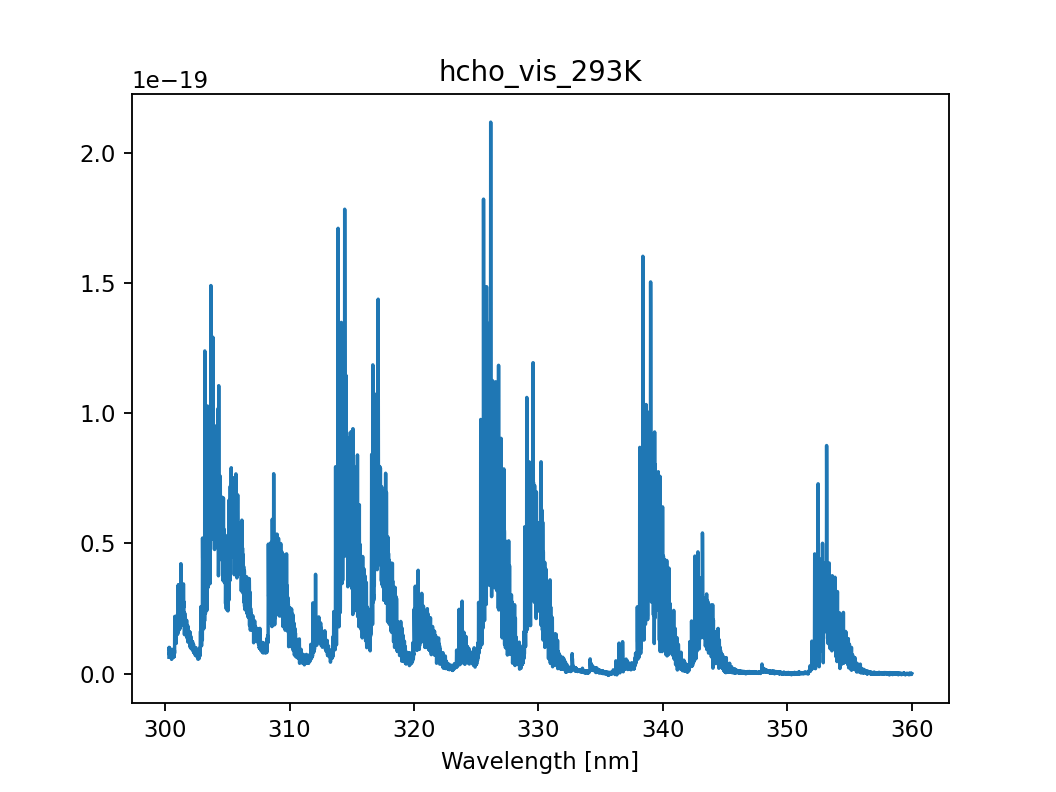

<IPython.core.display.Javascript object>


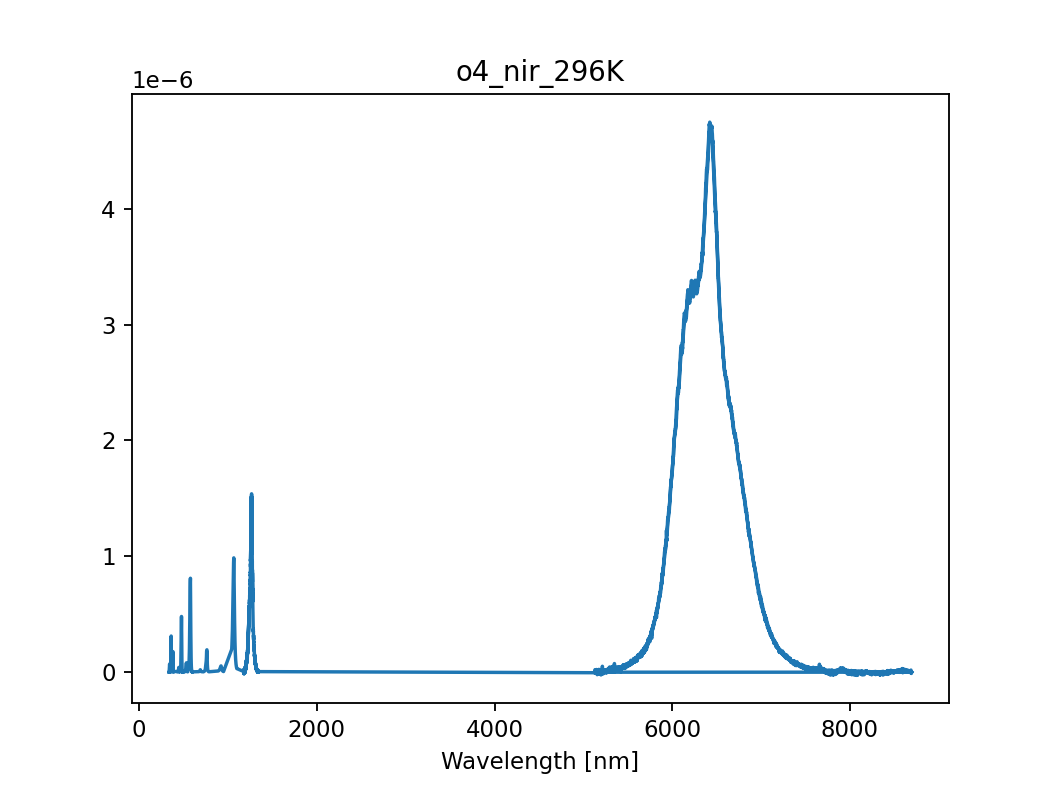

<IPython.core.display.Javascript object>


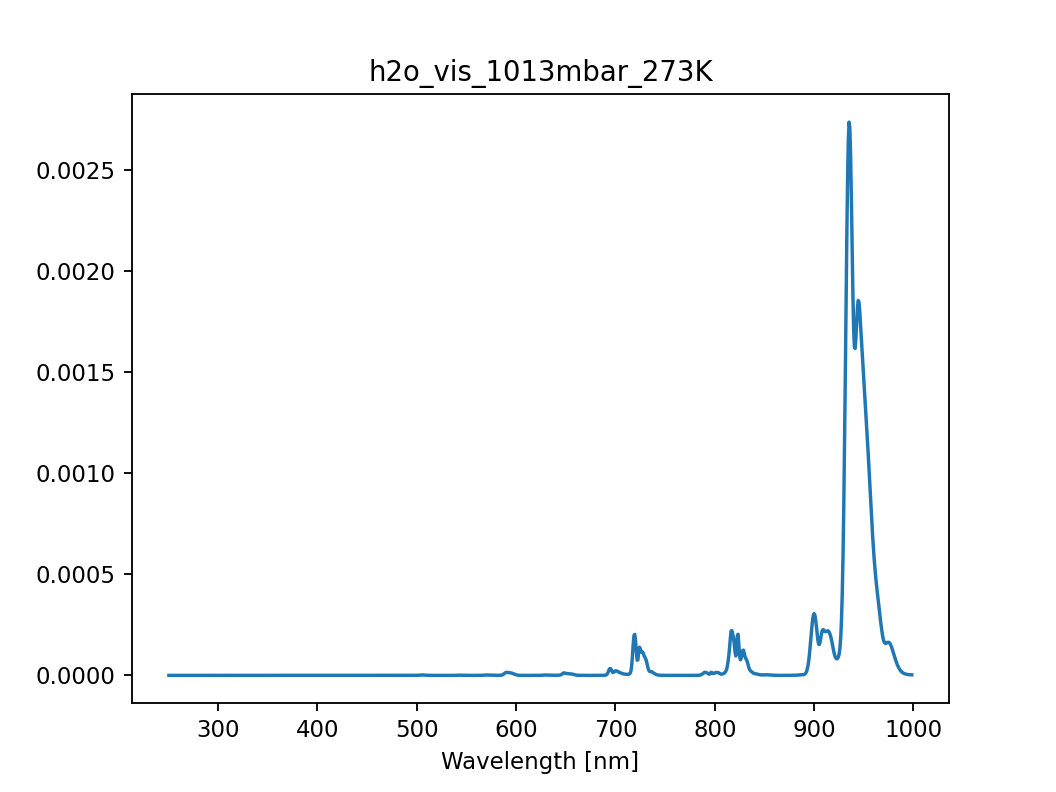

<IPython.core.display.Javascript object>


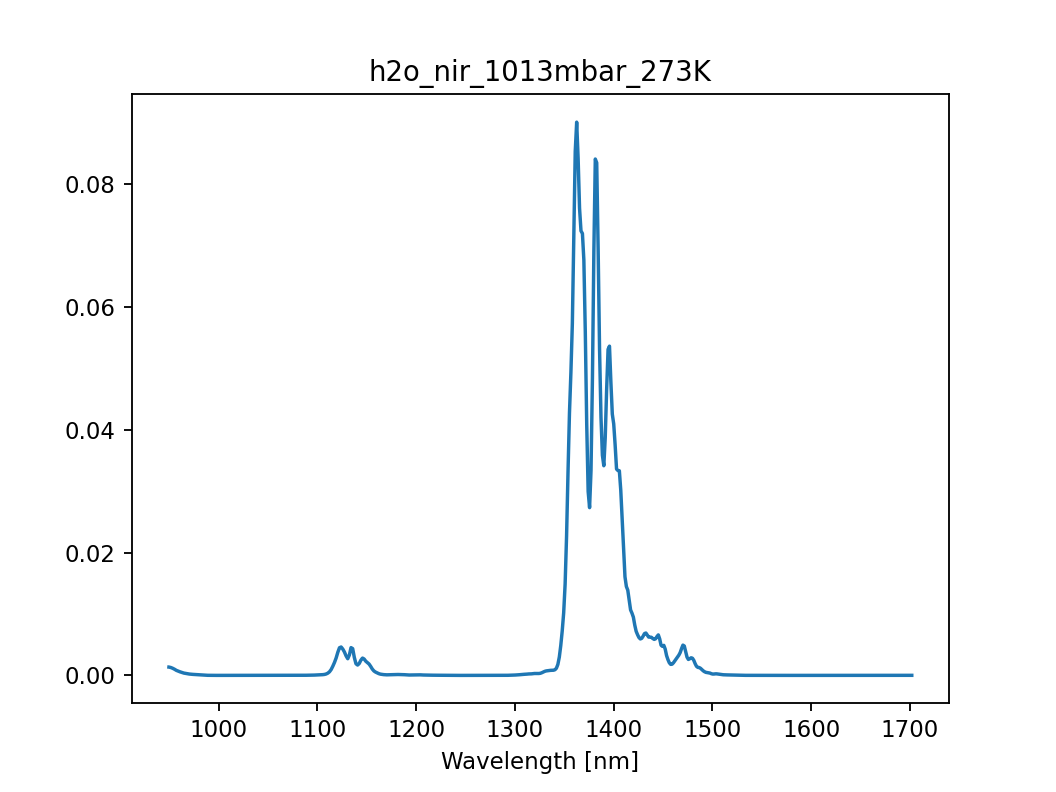

<IPython.core.display.Javascript object>


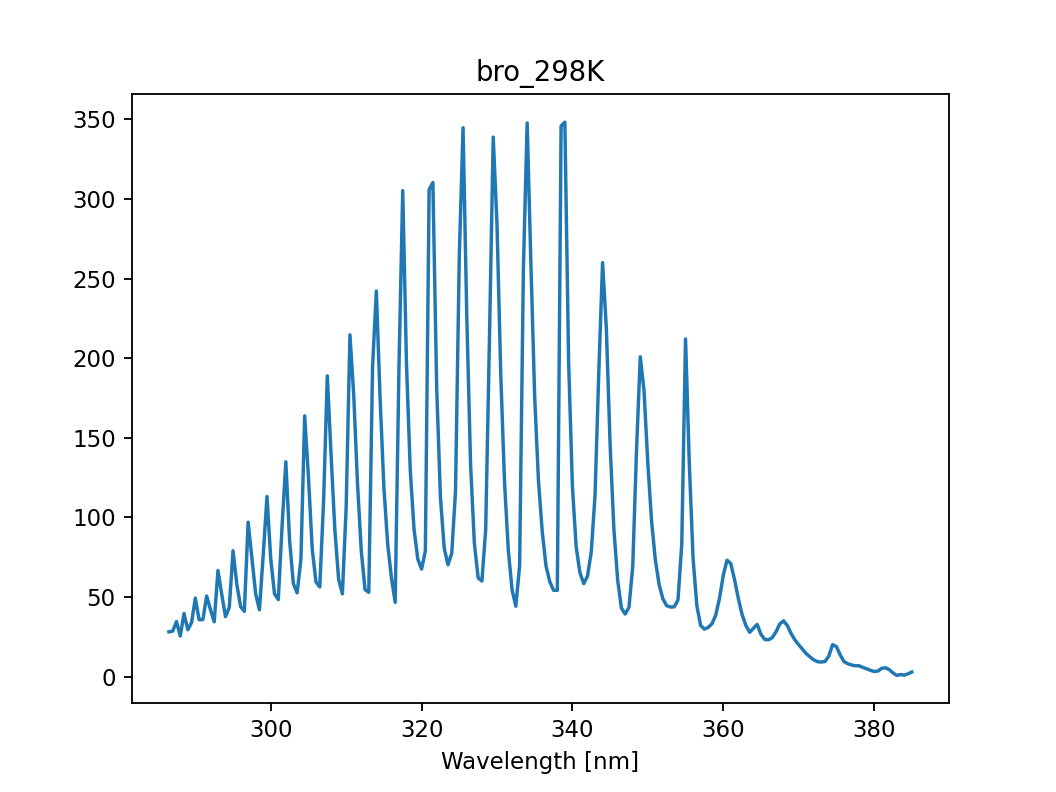

<IPython.core.display.Javascript object>


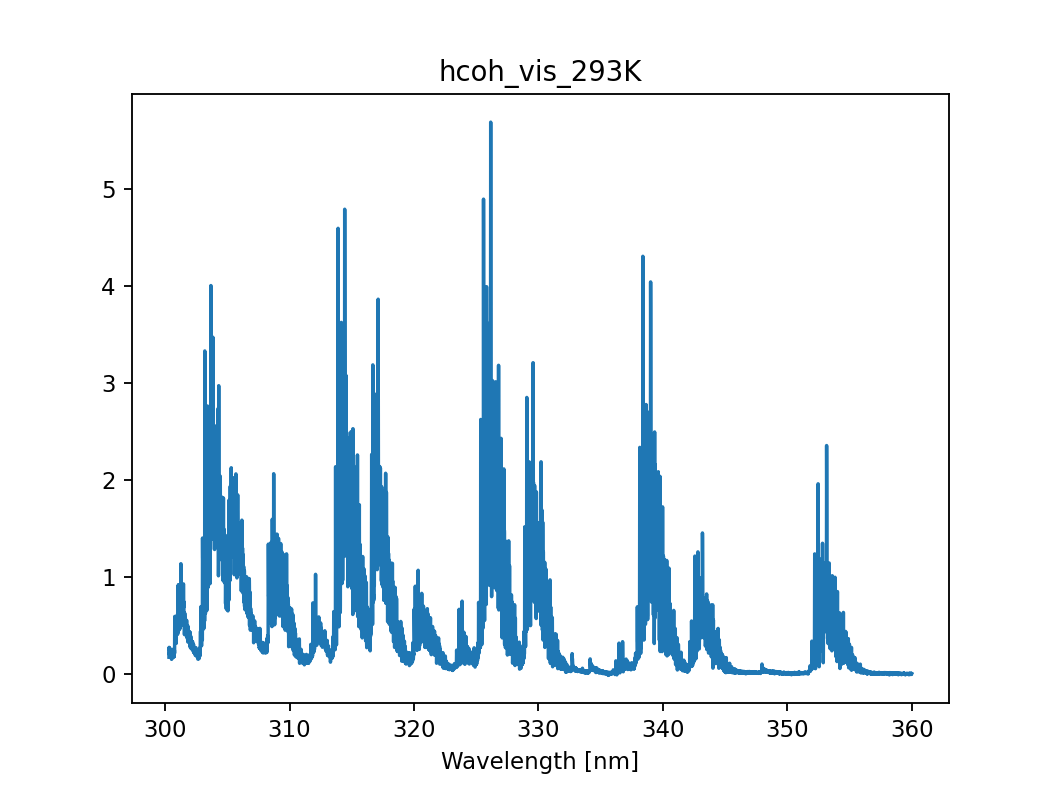

In [50]:
for k in list(gases.keys()):
    if 'wvl' in gases[k].keys():
        plt.figure()
        plt.plot(gases[k]['wvl'],gases[k]['coef'])
        plt.title(k)
        plt.xlabel('Wavelength [nm]')

## Convolve the xs files to 4STARB spectra (in nm)

In [51]:
pbar = tqdm(total=(len(s['vis_nm'][0])+len(s['nir_nm'][0]))*len(gases.keys()))
for k in list(gases.keys()):
    if 'wvl' in gases[k].keys():
        gases[k]['xs'] = np.append(np.zeros_like(s['vis_nm'][0]),np.zeros_like(s['nir_nm'][0]))*np.nan
        print('On gas: '+k)
        for i,v in enumerate(s['vis_nm'][0]): 
            inm_min = np.argmin(abs(gases[k]['wvl']-v-s['fwhm_vis'][0,i]*6.0))
            inm_max = np.argmin(abs(gases[k]['wvl']-v+s['fwhm_vis'][0,i]*6.0))
            slit = hapi.SLIT_GAUSSIAN(gases[k]['wvl']-v,s['fwhm_vis'][0,i])
            slit.flatten()
            gases[k]['xs'][i] = np.trapz(slit.flatten()*gases[k]['coef'].flatten(),gases[k]['wvl'])
            pbar.update(1)
        for i,v in enumerate(s['nir_nm'][0]): 
            slit = hapi.SLIT_GAUSSIAN(gases[k]['wvl']-v,s['fwhm_nir'][0,i])
            gases[k]['xs'][1044+i] = np.trapz(slit.flatten()*gases[k]['coef'].flatten(),gases[k]['wvl'])
            pbar.update(1)
    else:
        print('** No to gas: '+k)
        pbar.update(len(s['vis_nm'][0])+len(s['nir_nm'][0]))

  0%|          | 0/57572 [00:00<?, ?it/s]

On gas: no2_vis_220K
On gas: no2_vis_254K
On gas: no2_vis_298K
On gas: o3_vis_223K
On gas: o3_vis_293K
On gas: o4_vis_296K
** No to gas: o2_vis_1013mbar
On gas: hcho_vis_293K
** No to gas: h2o_vis_1013mbar_294K
** No to gas: h2o_vis_0902mbar_289K
** No to gas: h2o_vis_0802mbar_285K
** No to gas: h2o_vis_0710mbar_279K
** No to gas: h2o_vis_0628mbar_273K
** No to gas: h2o_vis_0554mbar_267K
** No to gas: h2o_vis_0487mbar_261K
** No to gas: h2o_vis_0426mbar_254K
** No to gas: h2o_vis_0372mbar_248K
** No to gas: h2o_vis_0324mbar_241K
** No to gas: h2o_vis_0281mbar_235K
** No to gas: h2o_nir_1013mbar_294K
** No to gas: h2o_nir_0902mbar_289K
** No to gas: h2o_nir_0802mbar_285K
** No to gas: h2o_nir_0710mbar_279K
** No to gas: h2o_nir_0628mbar_273K
** No to gas: h2o_nir_0554mbar_267K
** No to gas: h2o_nir_0487mbar_261K
** No to gas: h2o_nir_0426mbar_254K
** No to gas: h2o_nir_0372mbar_248K
** No to gas: h2o_nir_0324mbar_241K
** No to gas: h2o_nir_0281mbar_235K
** No to gas: ch4_nir_1013mbar
**

In [52]:
# special for o4
for k in ['o4_vis_296K','o4_nir_296K']:
    for i,v in enumerate(s['vis_nm'][0]): 
        inm_min = np.argmin(abs(gases[k]['wvl'].flatten()-v-s['fwhm_vis'][0,i]*5.0))
        inm_max = np.argmin(abs(gases[k]['wvl'].flatten()-v+s['fwhm_vis'][0,i]*5.0))
        slit = hapi.SLIT_GAUSSIAN(gases[k]['wvl'][inm_min:inm_max]-v,s['fwhm_vis'][0,i])
        gases[k]['xs'][i] = np.trapz(slit*gases[k]['coef'][inm_min:inm_max],gases[k]['wvl'][inm_min:inm_max])*-1.0
    for i,v in enumerate(s['nir_nm'][0]): 
        inm_min = np.argmin(abs(gases[k]['wvl'].flatten()-v-s['fwhm_nir'][0,i]*5.0))
        inm_max = np.argmin(abs(gases[k]['wvl'].flatten()-v+s['fwhm_nir'][0,i]*5.0))
        slit = hapi.SLIT_GAUSSIAN(gases[k]['wvl'][inm_min:inm_max]-v,s['fwhm_nir'][0,i])
        gases[k]['xs'][1044+i] = np.trapz(slit*gases[k]['coef'][inm_min:inm_max],gases[k]['wvl'][inm_min:inm_max])*-1.0

In [53]:
gases_wln = np.append(s['vis_nm'][0],s['nir_nm'][0])

### plot out the convolution and the raw crossections

<IPython.core.display.Javascript object>


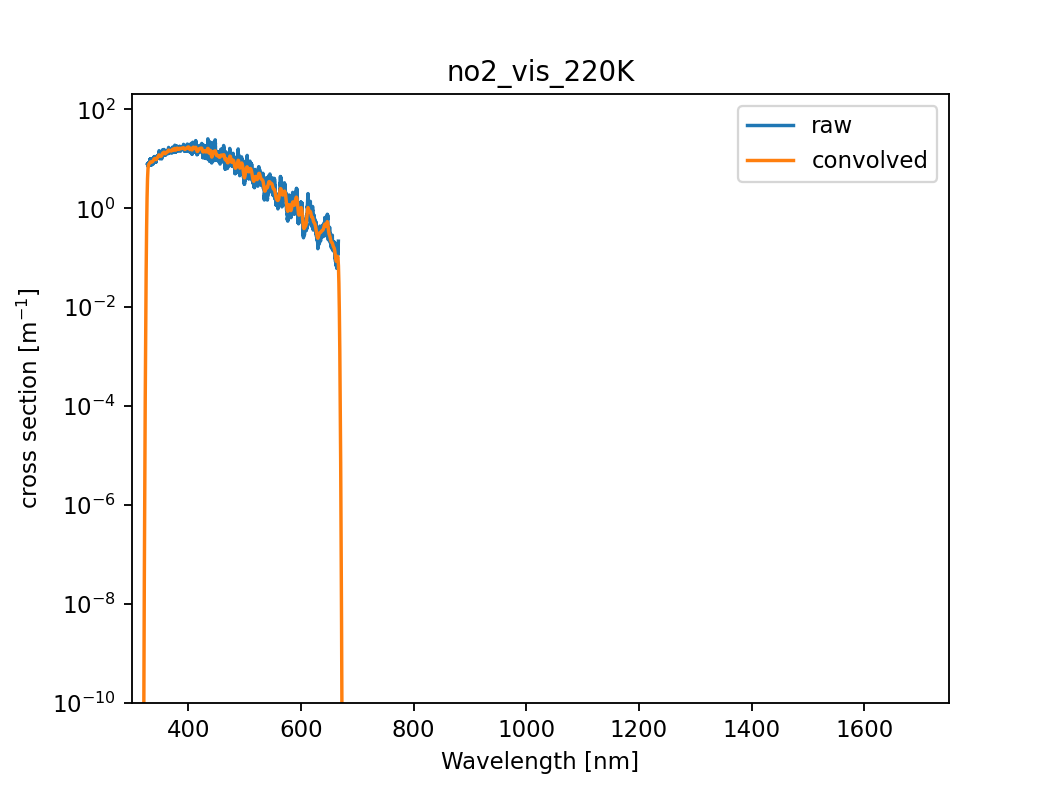

<IPython.core.display.Javascript object>


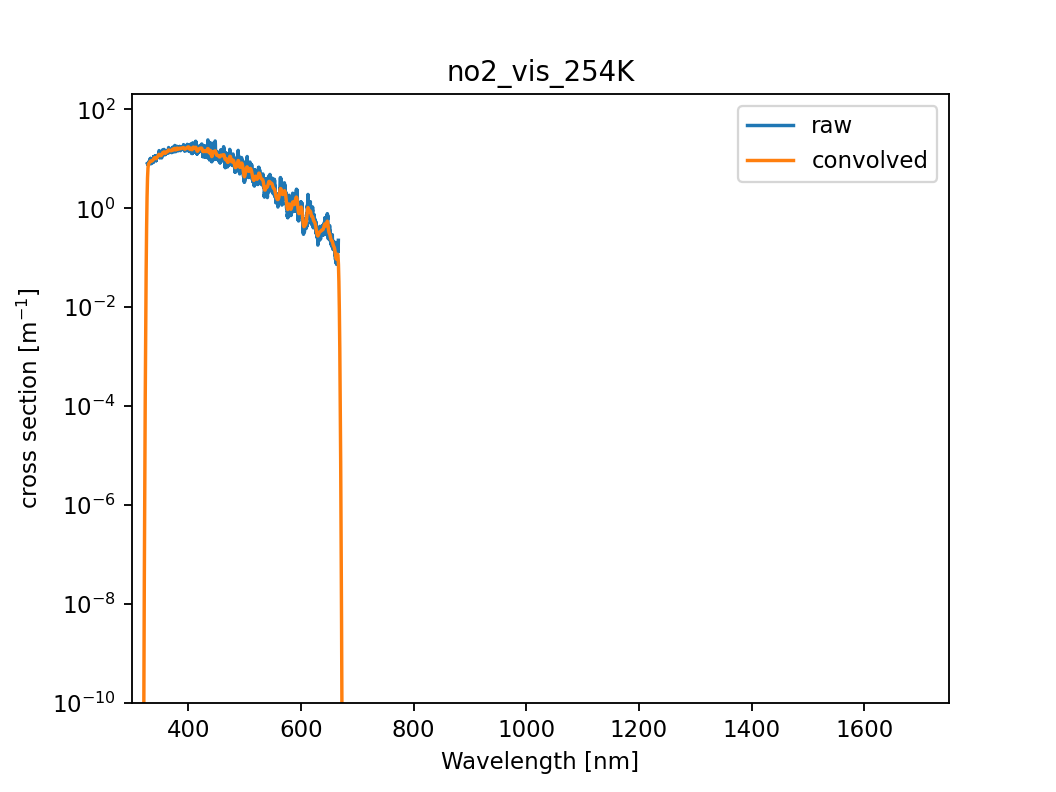

<IPython.core.display.Javascript object>


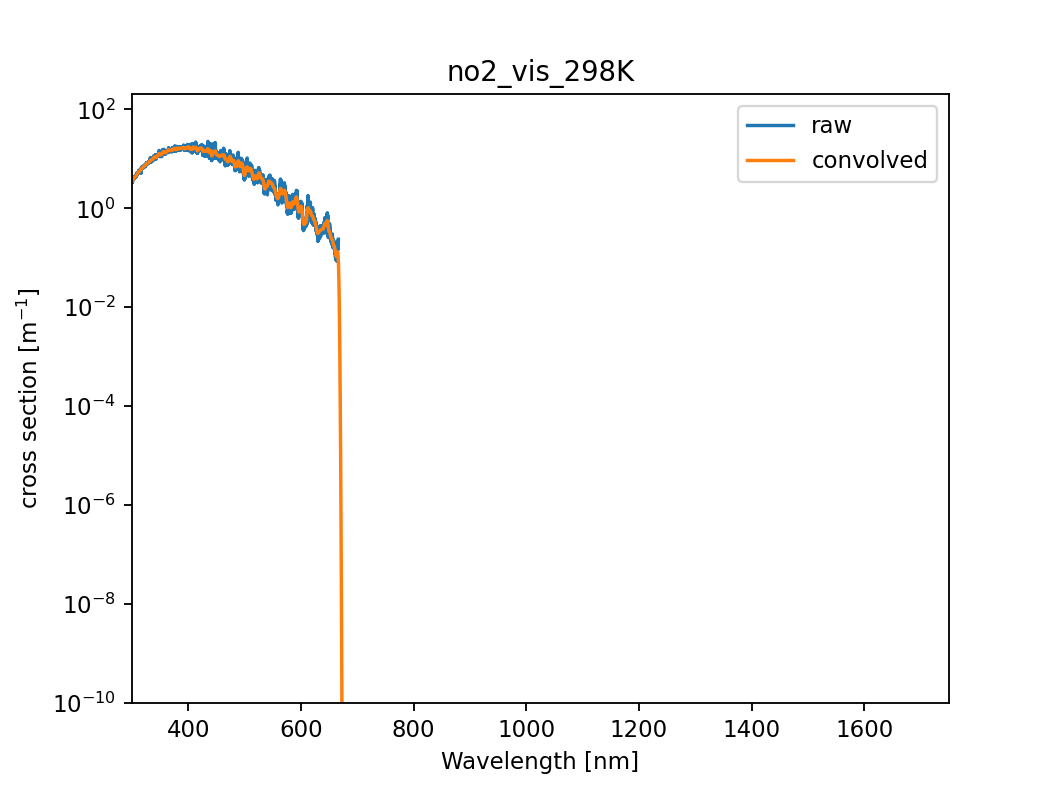

<IPython.core.display.Javascript object>


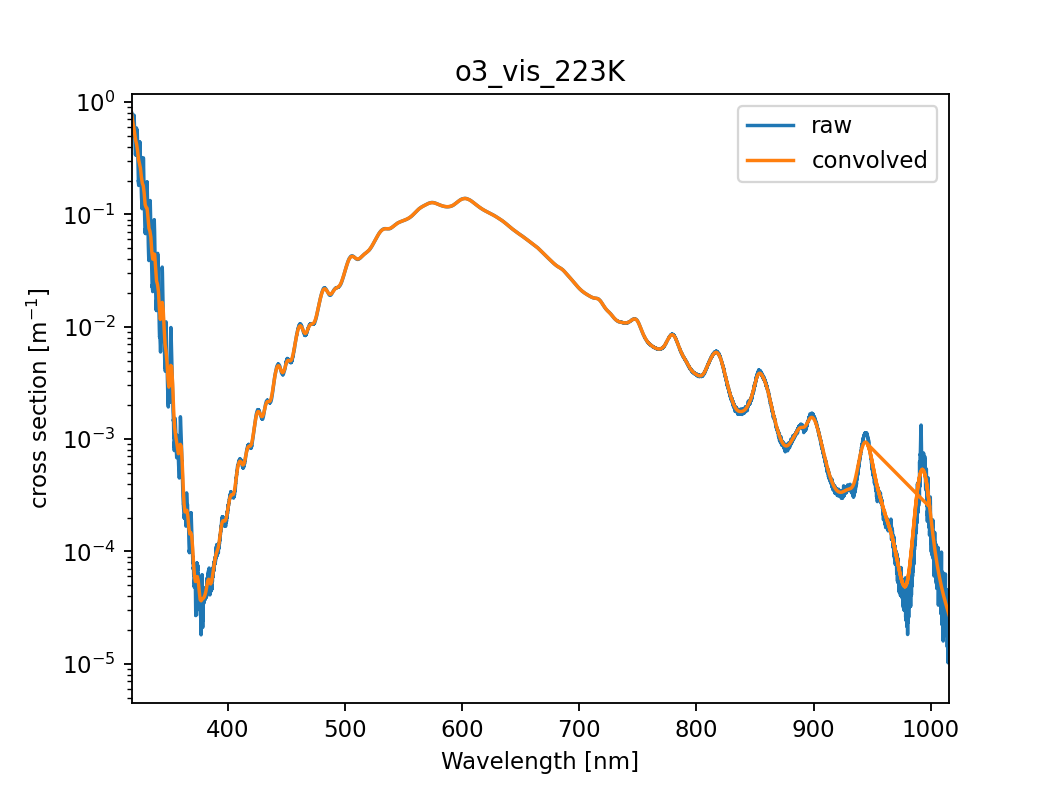

<IPython.core.display.Javascript object>


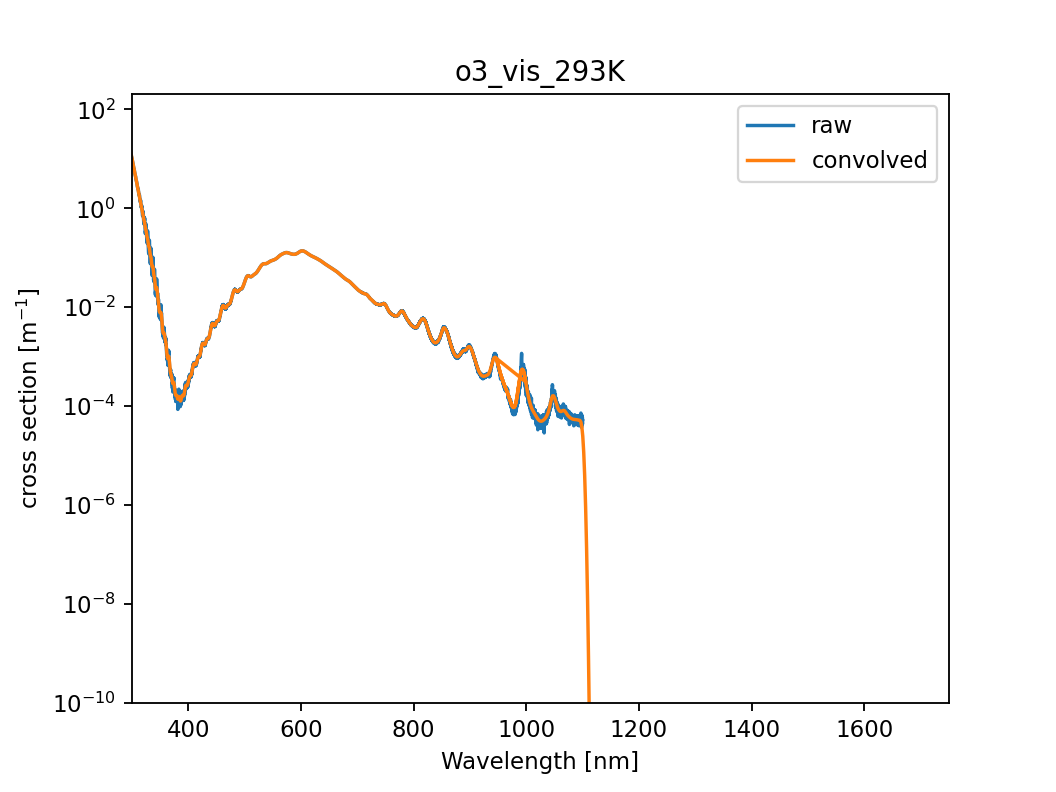

<IPython.core.display.Javascript object>


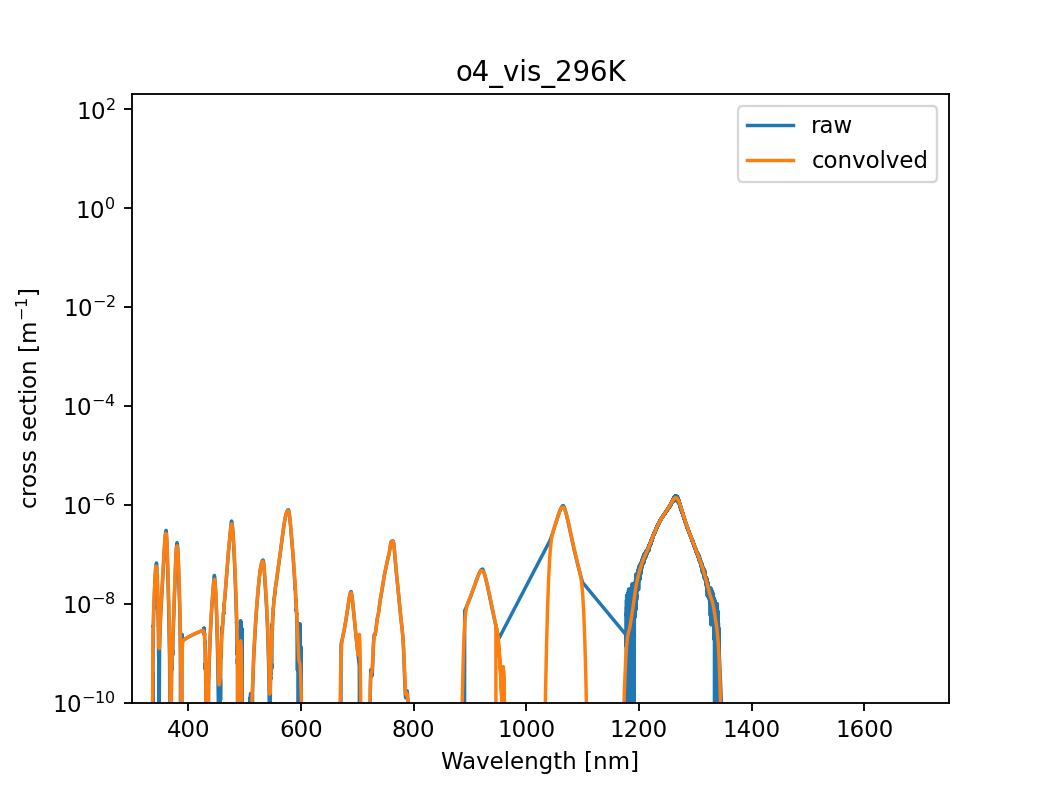

<IPython.core.display.Javascript object>


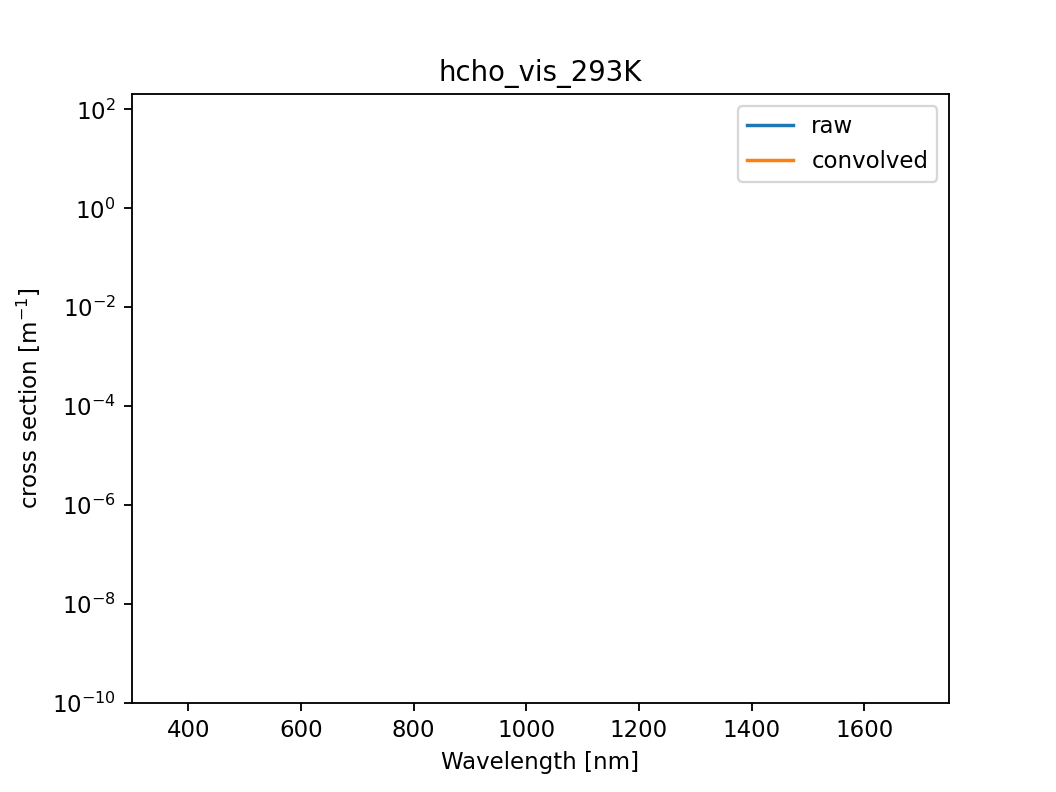

<IPython.core.display.Javascript object>


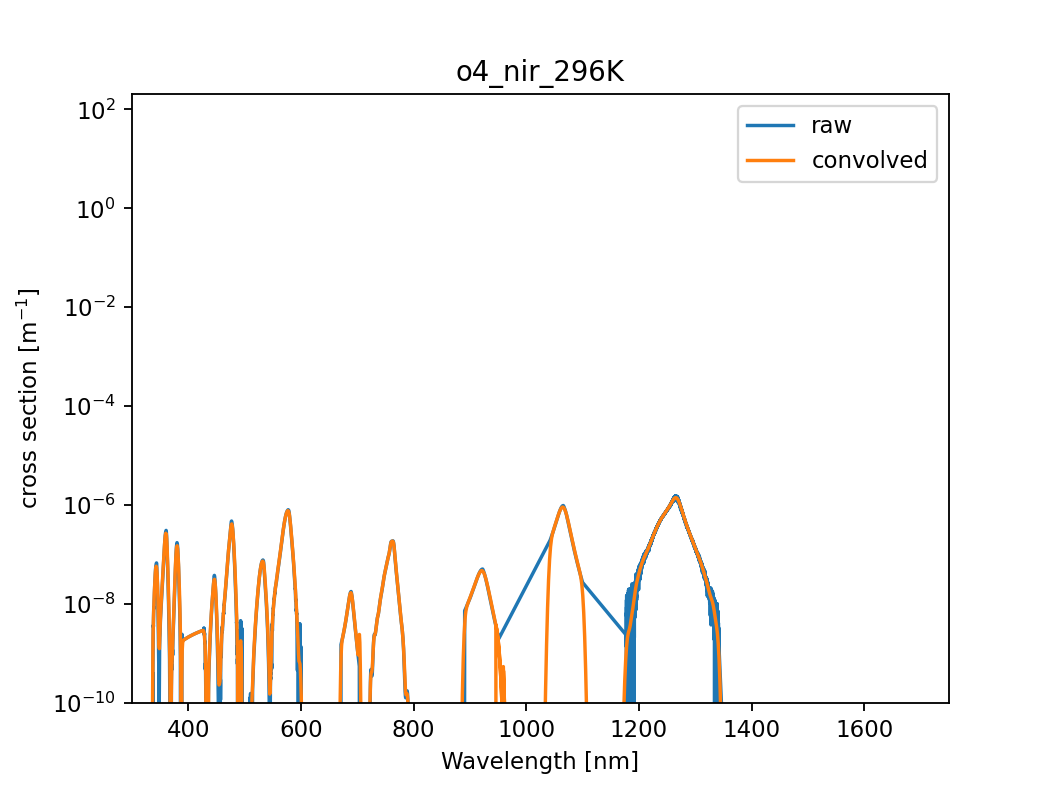

<ipython-input-54-eb917ea81b22>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


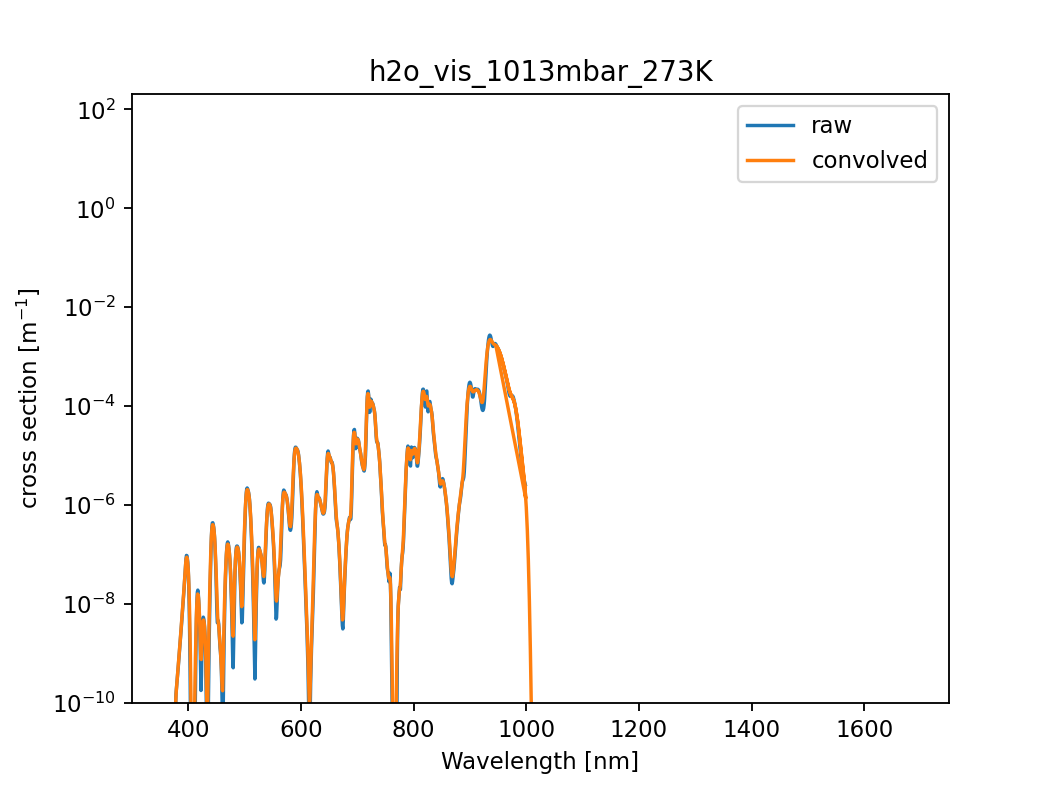

<IPython.core.display.Javascript object>


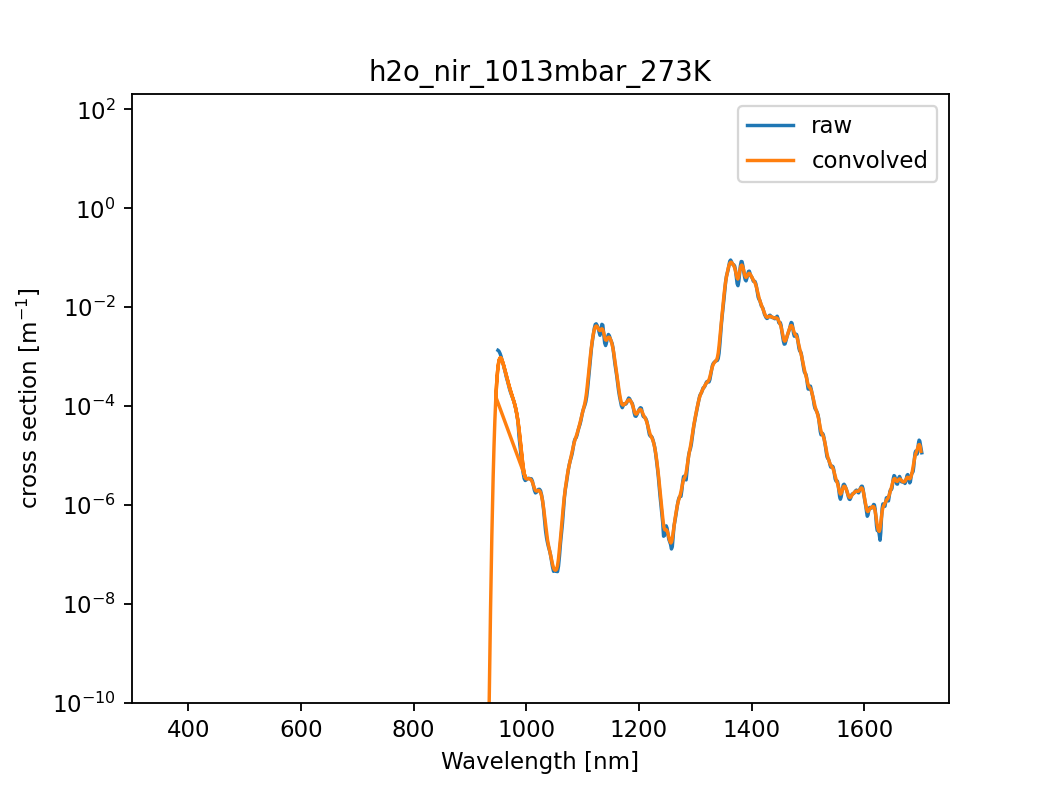

<IPython.core.display.Javascript object>


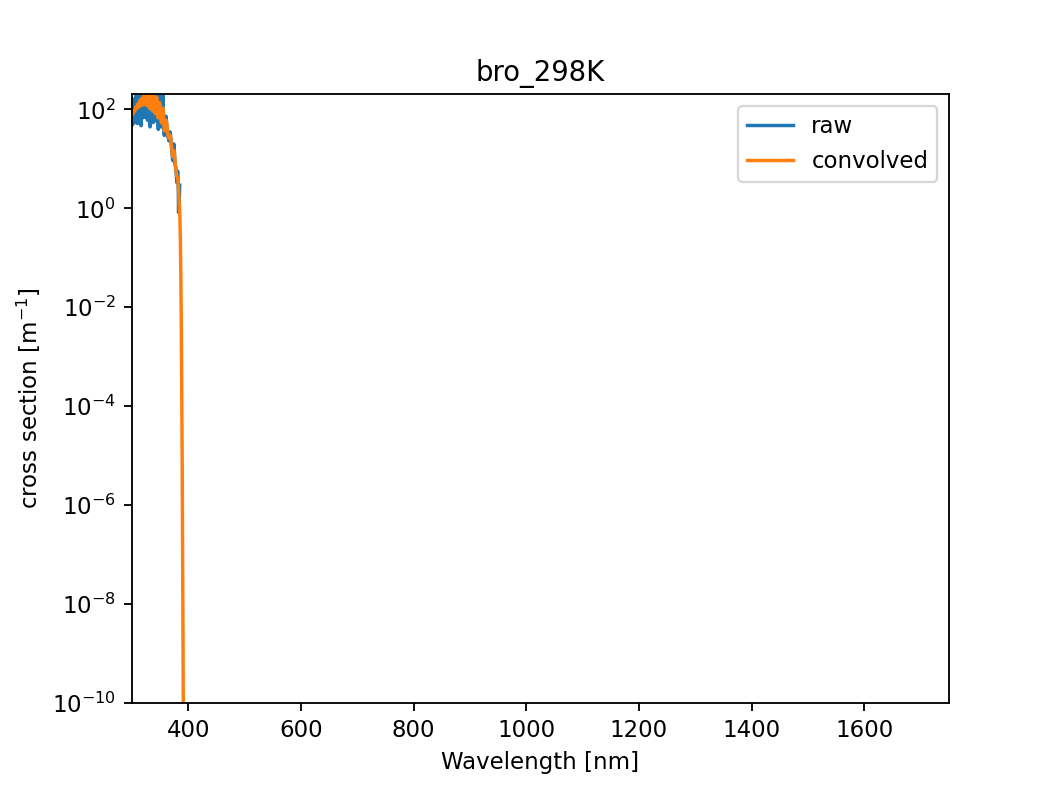

<IPython.core.display.Javascript object>


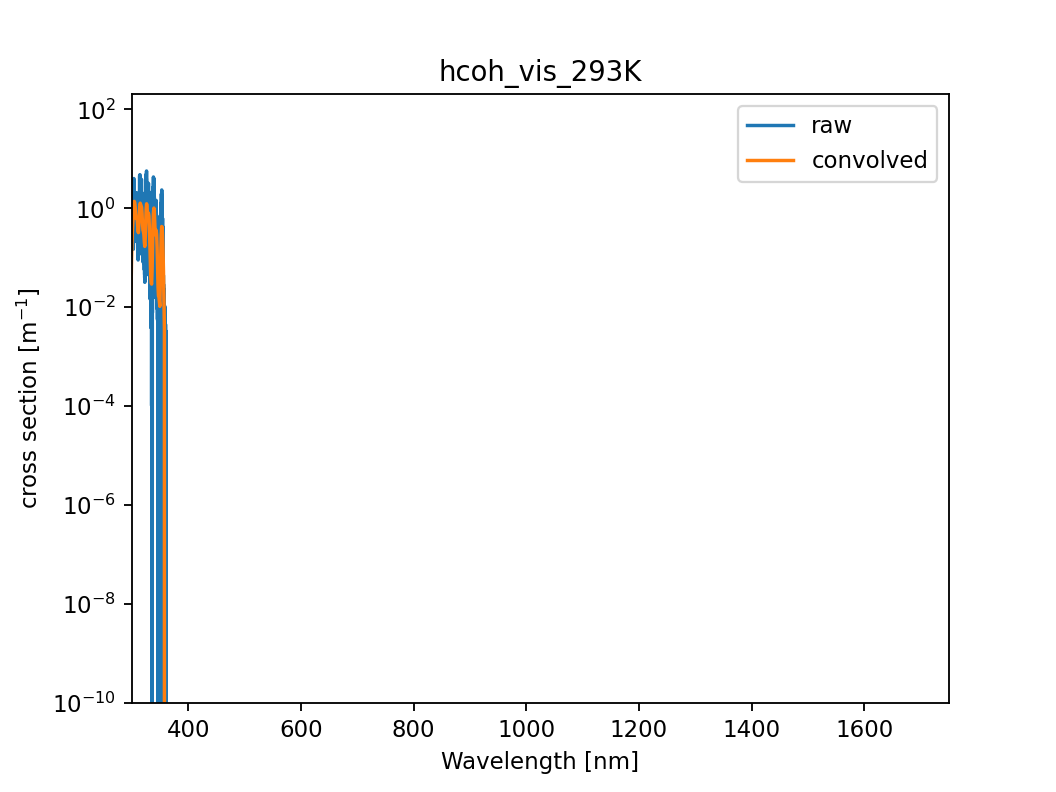

In [54]:
for k in list(gases.keys()):
    if 'wvl' in gases[k].keys():
        plt.figure() 
        plt.plot(gases[k]['wvl'].flatten(),gases[k]['coef'].flatten(),label='raw')
        plt.plot(gases_wln,gases[k]['xs'].flatten(),label='convolved')
        plt.xlim([300,1750])
        plt.gca().set_yscale('log')
        plt.ylim([1E-10,200])

        plt.title(k)
        plt.xlabel('Wavelength [nm]')
        plt.ylabel('cross section [m$^{{-1}}$]')
        plt.legend()
        

## Run through the lines and convolve

In [155]:
pbar = tqdm(total=(len(s['vis_nm'][0])+len(s['nir_nm'][0]))*len(gases.keys()))
for k in list(gases.keys()):
    if not k in use_measured_xs.keys():
        gases[k]['xs'] = np.append(np.zeros_like(s['vis_nm'][0]),np.zeros_like(s['nir_nm'][0]))*np.nan
        print('On gas: '+k)
        nm = wvn_2_wvl(gases[k]['nu'][0,:])*1000.0
        for i,v in enumerate(s['vis_nm'][0]): 
            inm_min = np.argmin(abs(nm-v-s['fwhm_vis'][0,i]*6.0))
            inm_max = np.argmin(abs(nm-v+s['fwhm_vis'][0,i]*6.0))
            slit = hapi.SLIT_GAUSSIAN(nm[inm_min:inm_max]-v,s['fwhm_vis'][0,i])
            if len(slit)<1: 
                gases[k]['xs'][i] = 0.0
            else:
                gases[k]['xs'][i] = np.trapz(slit[:]*gases[k]['coef'][0,inm_min:inm_max],nm[inm_min:inm_max])*-1.0
            pbar.update(1)
        for i,v in enumerate(s['nir_nm'][0]): 
            inm_min = np.argmin(abs(nm-v-s['fwhm_nir'][0,i]*6.0))
            inm_max = np.argmin(abs(nm-v+s['fwhm_nir'][0,i]*6.0))
            slit = hapi.SLIT_GAUSSIAN(nm[inm_min:inm_max]-v,s['fwhm_nir'][0,i])
            gases[k]['xs'][1044+i] = np.trapz(slit*gases[k]['coef'][0,inm_min:inm_max],nm[inm_min:inm_max])*-1.0
            pbar.update(1)
        
    else:
        pbar.update(len(s['vis_nm'][0])+len(s['nir_nm'][0]))

  0%|          | 0/34232 [00:00<?, ?it/s]

On gas: o2_vis_1013mbar
On gas: h2o_vis_1013mbar_294K
On gas: h2o_vis_0902mbar_289K
On gas: h2o_vis_0802mbar_285K
On gas: h2o_vis_0710mbar_279K
On gas: h2o_vis_0628mbar_273K
On gas: h2o_vis_0554mbar_267K
On gas: h2o_vis_0487mbar_261K
On gas: h2o_vis_0426mbar_254K
On gas: h2o_vis_0372mbar_248K
On gas: h2o_vis_0324mbar_241K
On gas: h2o_vis_0281mbar_235K
On gas: ch4_nir_1013mbar
On gas: co2_nir_1013mbar


<IPython.core.display.Javascript object>


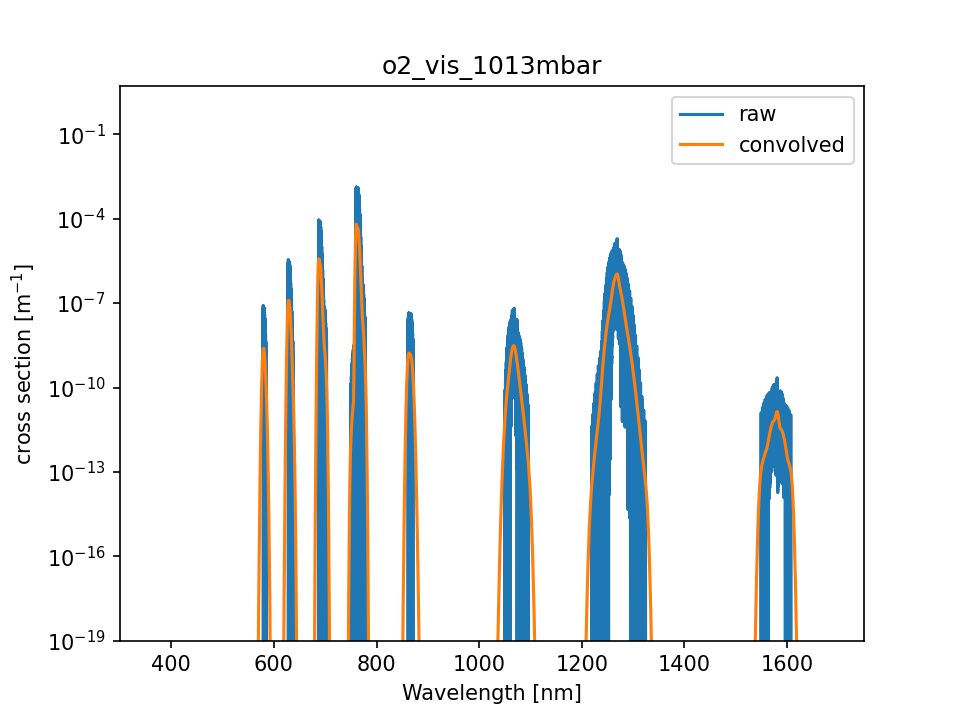

<IPython.core.display.Javascript object>


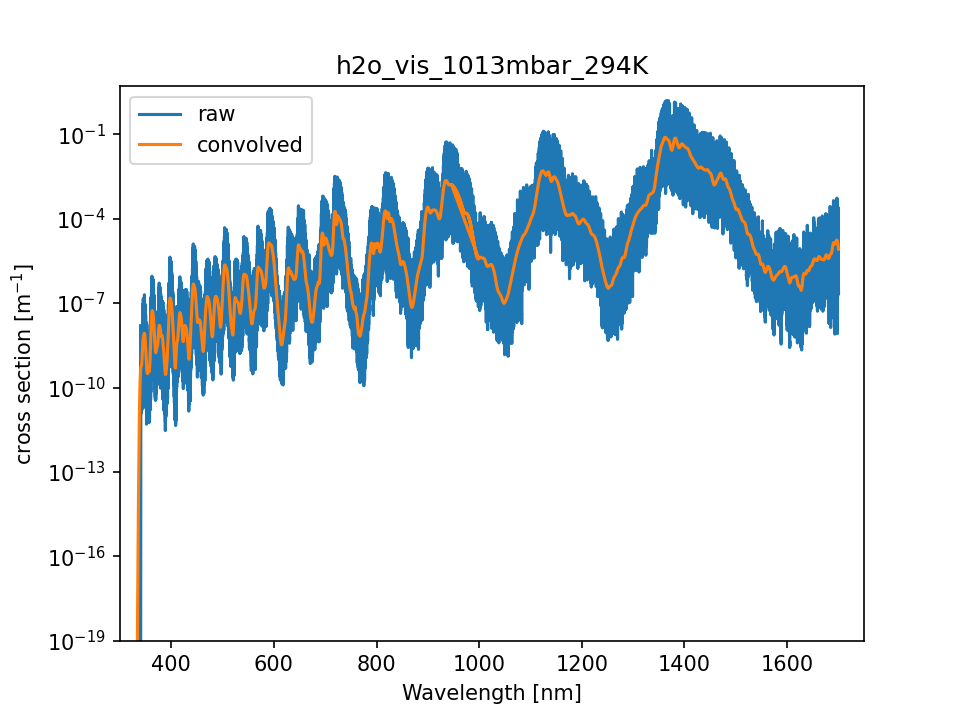

<IPython.core.display.Javascript object>


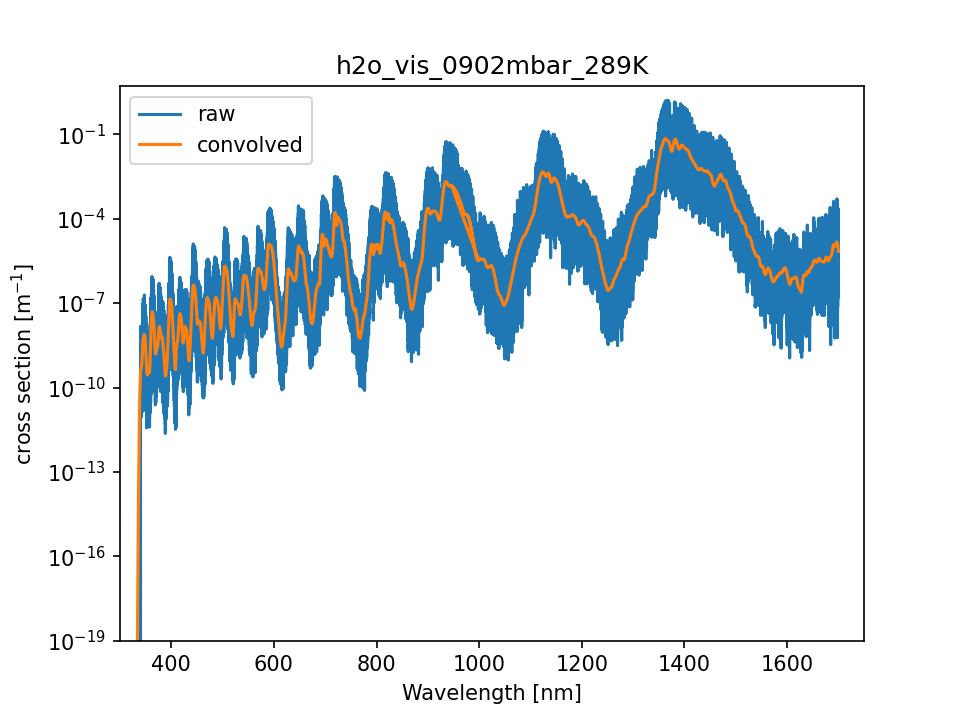

<IPython.core.display.Javascript object>


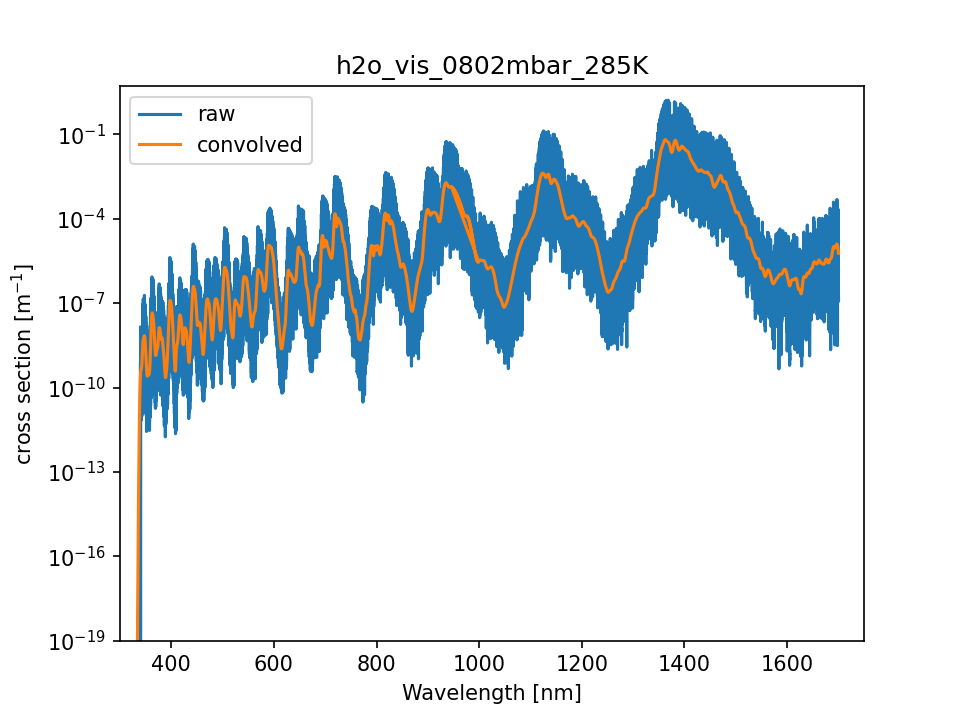

<IPython.core.display.Javascript object>


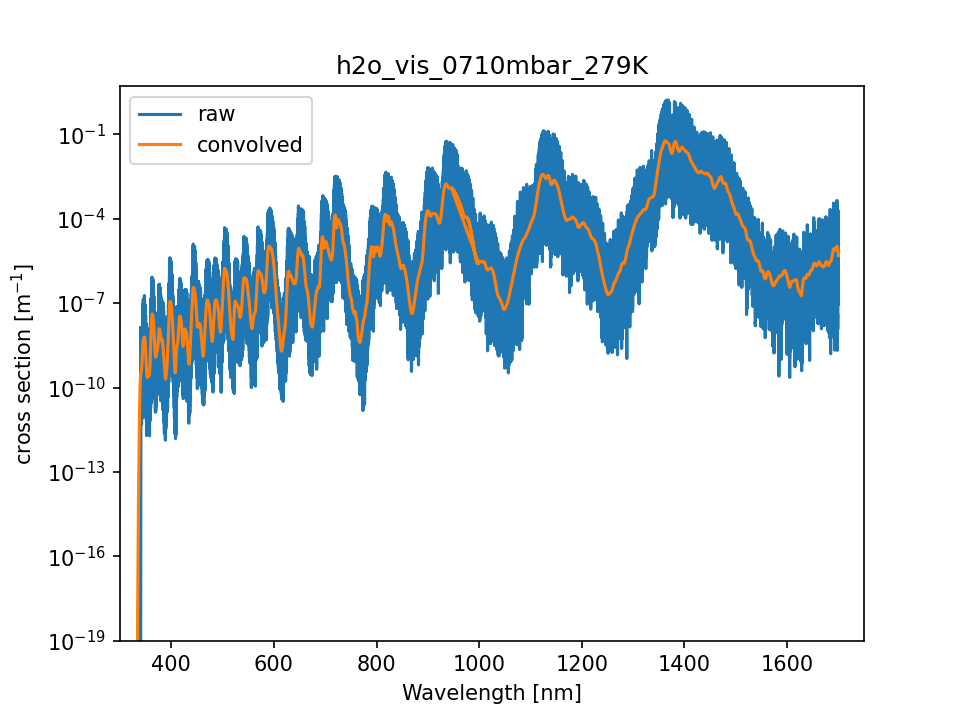

<IPython.core.display.Javascript object>


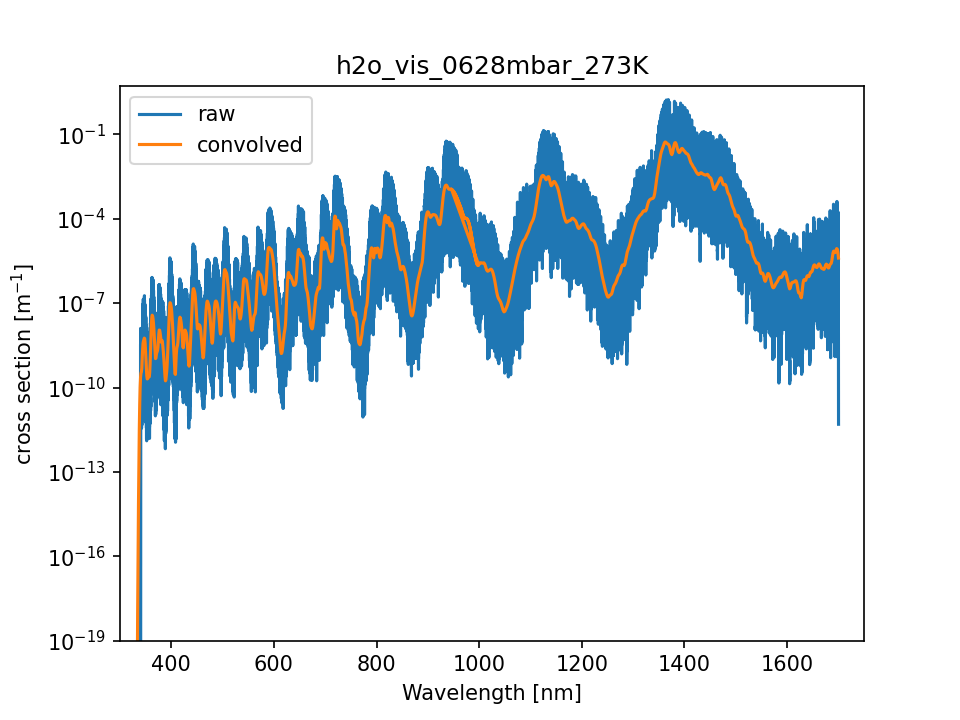

<IPython.core.display.Javascript object>


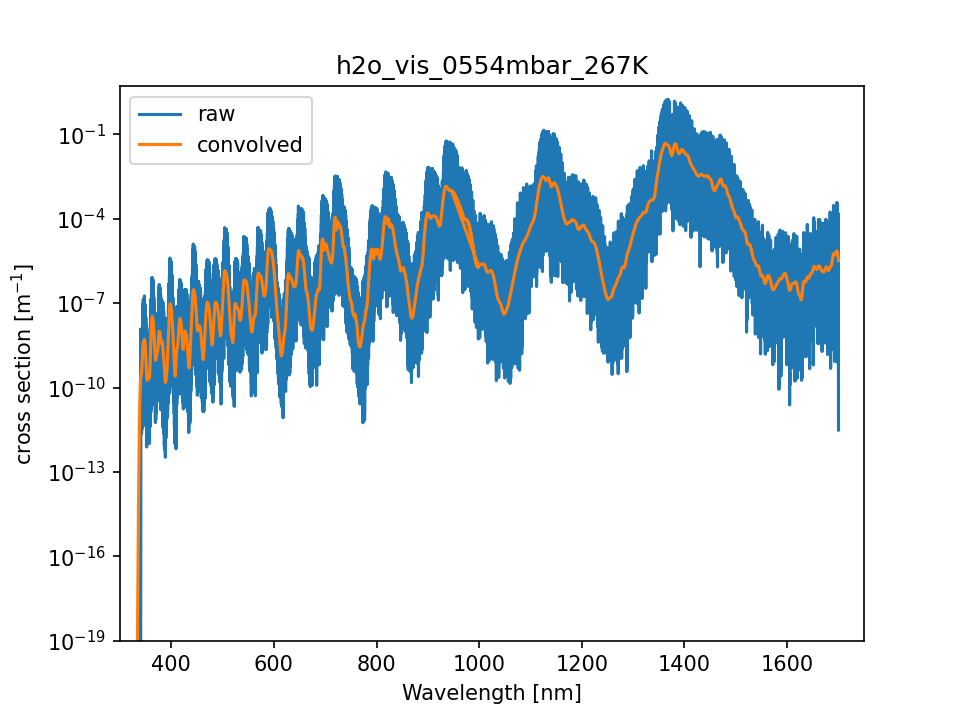

<IPython.core.display.Javascript object>


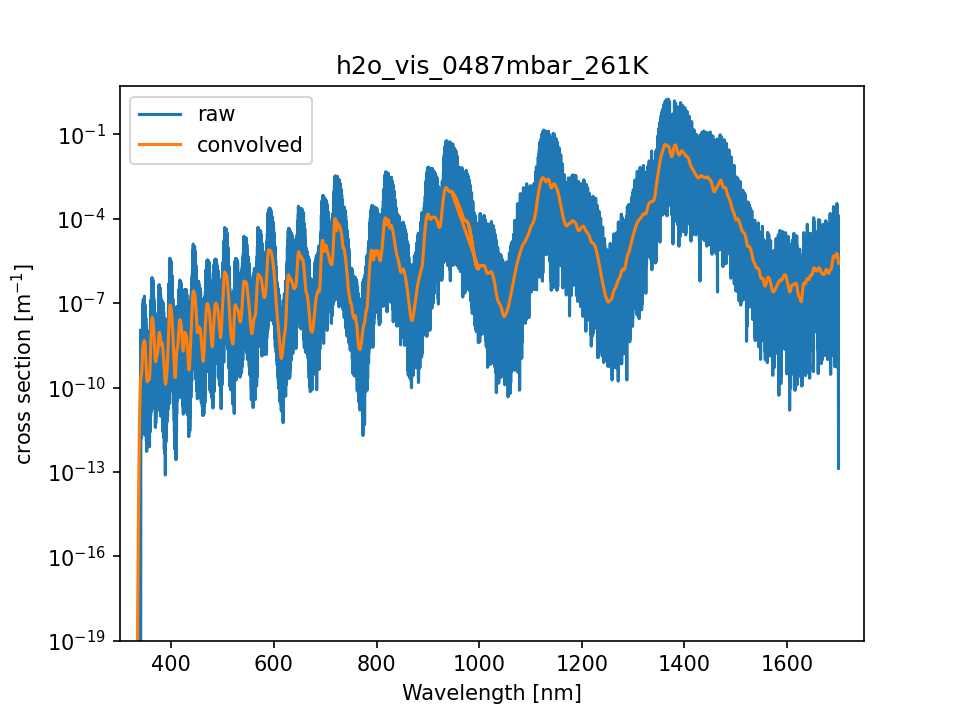

<IPython.core.display.Javascript object>


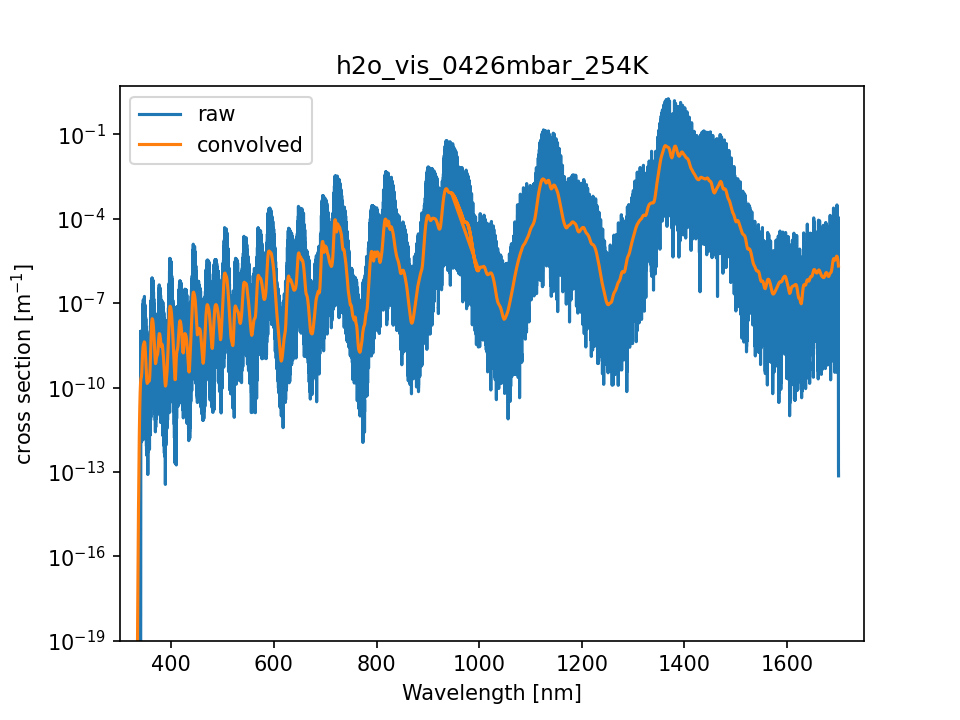

<IPython.core.display.Javascript object>


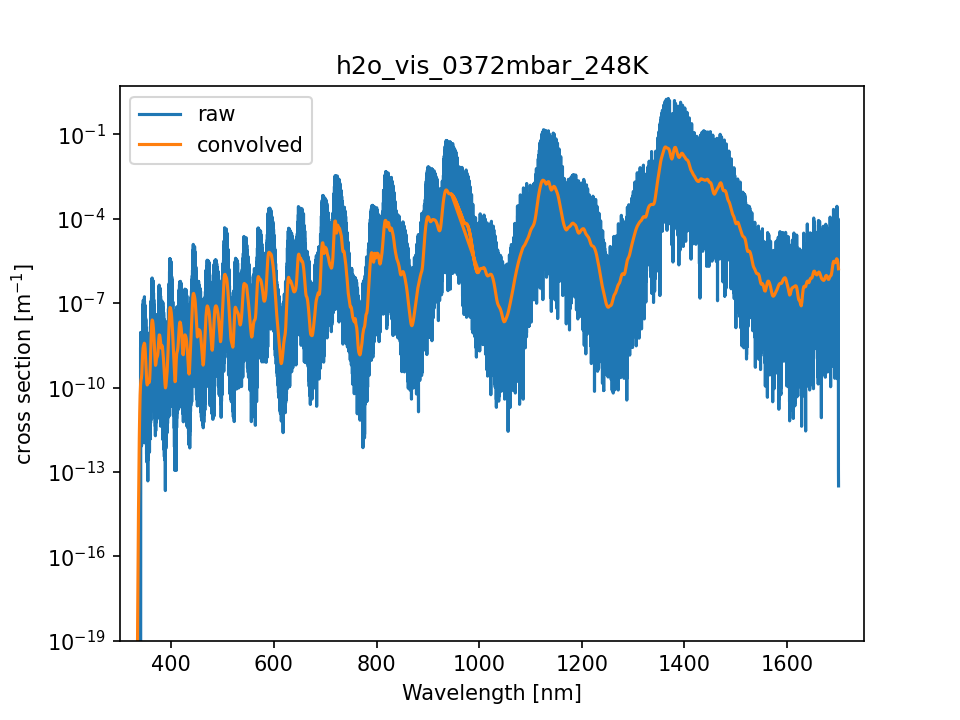

<IPython.core.display.Javascript object>


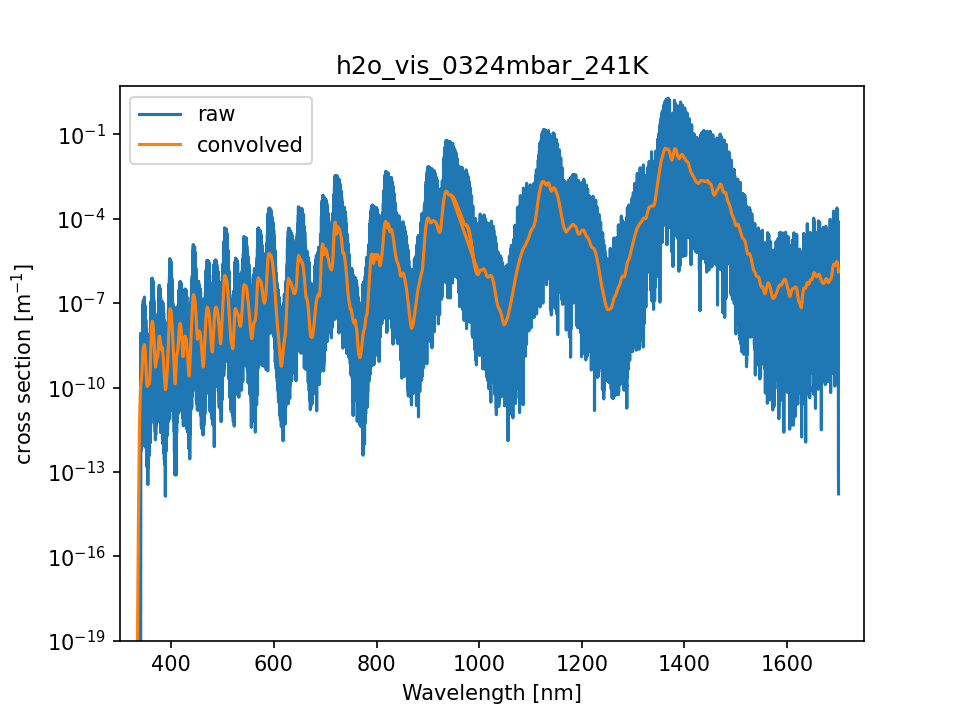

<ipython-input-172-cb36f4b8f11e>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<IPython.core.display.Javascript object>


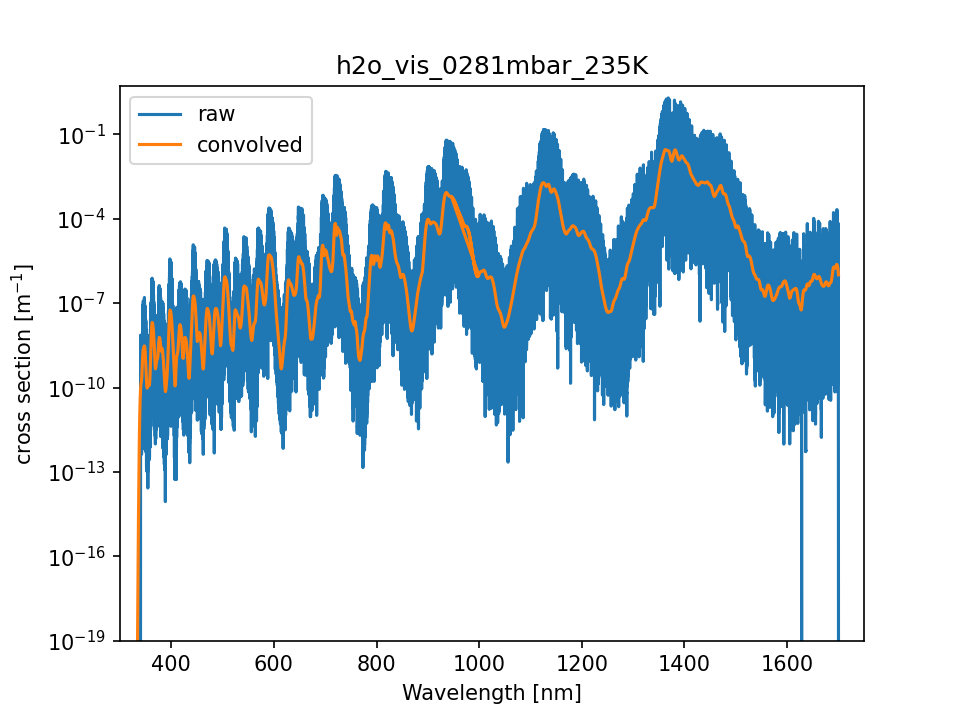

<IPython.core.display.Javascript object>


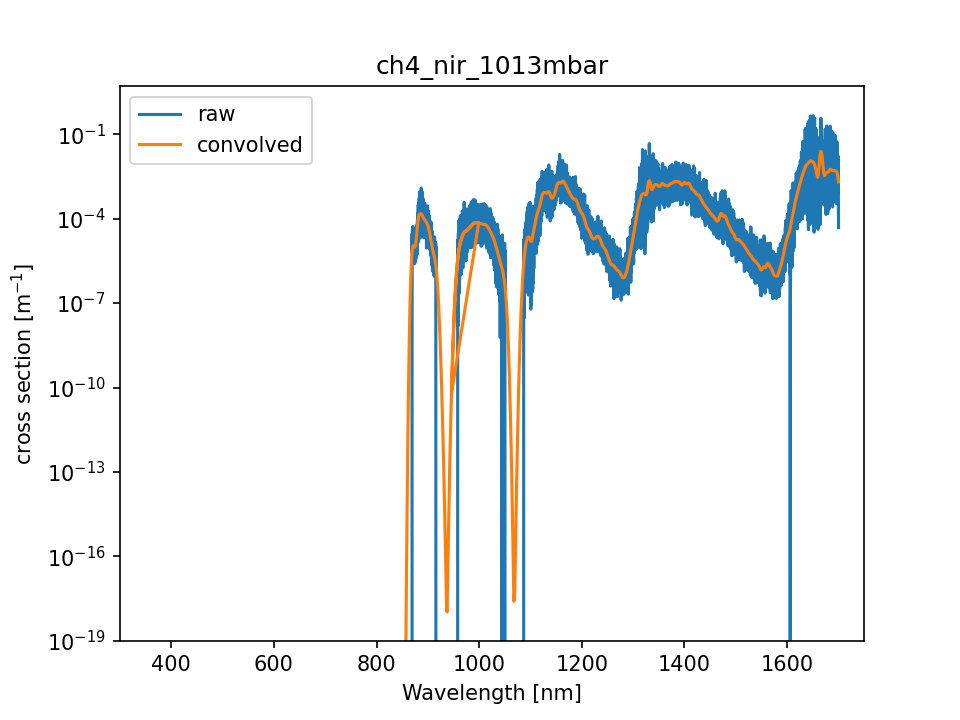

<IPython.core.display.Javascript object>


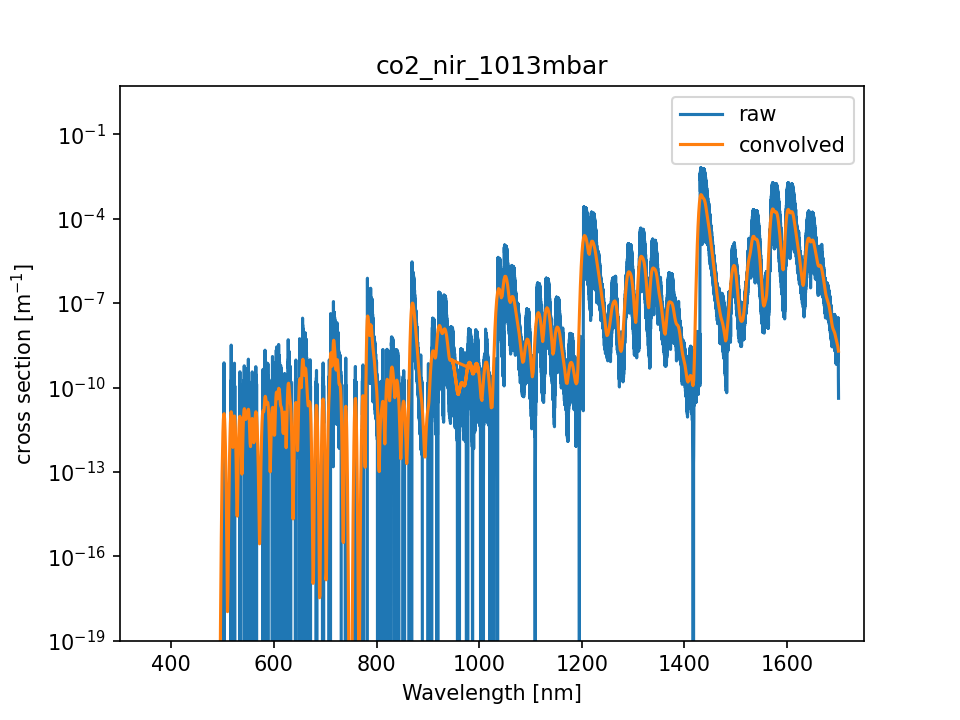

In [172]:
# plot these new cross sections
for k in list(gases.keys()):
    if not k in use_measured_xs.keys():
        plt.figure() 
        plt.plot(wvn_2_wvl(gases[k]['nu'][0,:])*1000.0,gases[k]['coef'][0,:],label='raw')
        if gases[k]['xs'].shape[0] ==1 : 
            gases[k]['xs'] = gases[k]['xs'].flatten()
        plt.plot(gases_wln,gases[k]['xs'],label='convolved')
        plt.xlim([300,1750])
        
        plt.gca().set_yscale('log')
        plt.ylim([1E-19,5])

        plt.title(k)
        plt.xlabel('Wavelength [nm]')
        plt.ylabel('cross section [m$^{{-1}}$]')
        plt.legend()

In [217]:
sio.savemat(fph+'hitran_atm_trace_gases_20220708.mat',gases)

In [273]:
for k in list(gases.keys()):
    gases[k]['xs_vis'] = np.zeros_like(s['vis_nm'][0])*np.nan
    print('On gas: '+k)
    pbar = tqdm(total=len(s['vis_nm'][0]))
    for i,v in enumerate(s['vis_nm'][0]): 
        isub = (wvn_2_wvl(gases[k]['nu'])>=(v-20.0)/1000.0) & (wvn_2_wvl(gases[k]['nu'])<=(v+20.0)/1000.0)
        if not any(isub): continue
        nu_,xsec_,i1,i2,slit = hapi.convolveSpectrum(np.flip(gases[k]['nu'][isub]),np.flip(gases[k]['coef'][isub]),
                                                   Resolution=(wvl_2_wvn((v-s['fwhm_vis'][0,i]/2.0)/1000.0)-wvl_2_wvn((v+s['fwhm_vis'][0,i]/2.0)/1000.0)),
                                                   AF_wing=wvl_2_wvn((v+7.5)/1000.0)-wvl_2_wvn((v-7.5)/1000.0),
                                                   SlitFunction=hapi.SLIT_GAUSSIAN)
        if any(nu_):
            iu = np.argmin(abs(wvn_2_wvl(nu_)-v/1000.0))
            gases[k]['xs_vis'][i] = xsec_[iu]
        pbar.update(1)

On gas: no2_vis_220K


  0%|          | 0/1044 [00:00<?, ?it/s]

On gas: no2_vis_254K


  0%|          | 0/1044 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



On gas: o3_vis_223K


  0%|          | 0/1044 [00:00<?, ?it/s]

On gas: o4_vis_296K


  0%|          | 0/1044 [00:00<?, ?it/s]

On gas: o2_vis_1013mbar


  0%|          | 0/1044 [00:00<?, ?it/s]

On gas: hcho_vis_293K


  0%|          | 0/1044 [00:00<?, ?it/s]

On gas: h2o_vis_1013mbar_294K


  0%|          | 0/1044 [00:00<?, ?it/s]

On gas: h2o_vis_0802mbar_285K


  0%|          | 0/1044 [00:00<?, ?it/s]

On gas: h2o_vis_0710mbar_279K


  0%|          | 0/1044 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



On gas: h2o_vis_0628mbar_273K


  0%|          | 0/1044 [00:00<?, ?it/s]

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/usr/lib/python3.8/threading.py", line 932, in _bootstrap_inner
    self.run()
  File "/home/sam/.local/lib/python3.8/site-packages/tqdm/_monitor.py", line 69, in run
    instances = self.get_instances()
  File "/home/sam/.local/lib/python3.8/site-packages/tqdm/_monitor.py", line 49, in get_instances
    return [i for i in self.tqdm_cls._instances.copy()
  File "/usr/lib/python3.8/_weakrefset.py", line 92, in copy
    return self.__class__(self)
  File "/usr/lib/python3.8/_weakrefset.py", line 50, in __init__
    self.update(data)
  File "/usr/lib/python3.8/_weakrefset.py", line 119, in update
    for element in other:
  File "/usr/lib/python3.8/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration


On gas: h2o_vis_0554mbar_267K


  0%|          | 0/1044 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



On gas: h2o_vis_0426mbar_254K


  0%|          | 0/1044 [00:00<?, ?it/s]

On gas: h2o_vis_0372mbar_248K


  0%|          | 0/1044 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



On gas: co2_nir_1013mbar


  0%|          | 0/1044 [00:00<?, ?it/s]

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
sio.savemat(fph+'hitran_atm_trace_gases_20220513.mat',gases)

In [369]:
gases['co2_nir_1013mbar']['xs_vis'].shape

(1, 1044)

<IPython.core.display.Javascript object>


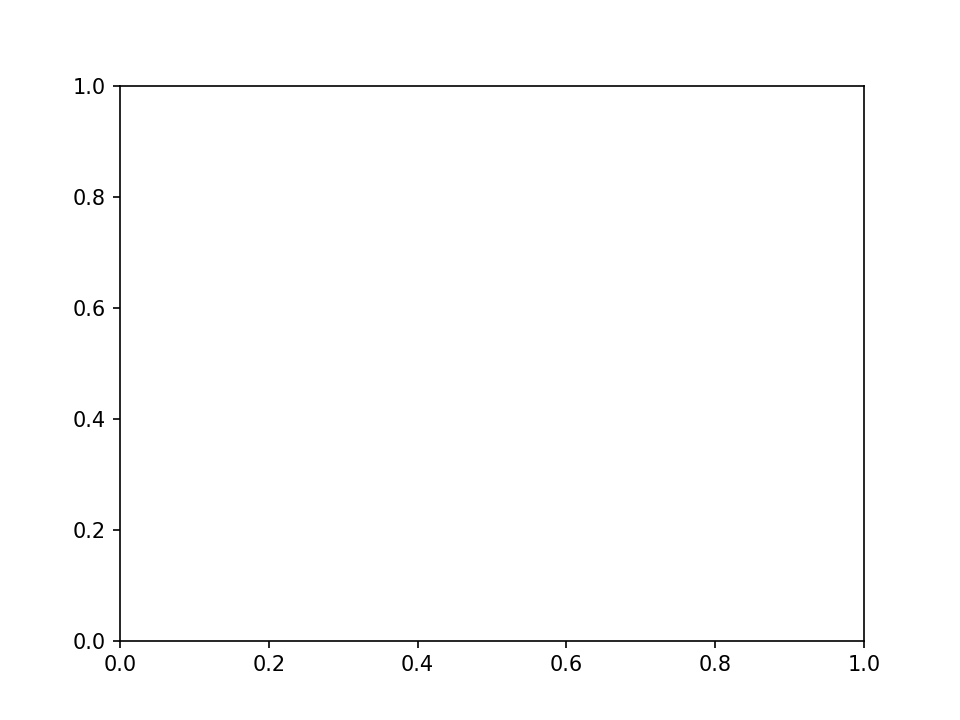

ValueError: x and y must have same first dimension, but have shapes (1044,) and (1, 1044)

In [56]:
for k in list(gases.keys()):
    plt.figure()
    plt.plot(s['vis_nm'][0],gases[k]['xs_vis'])
    plt.xlabel('Wavelength [nm]')
    plt.ylabel('Cross section [m$^{{-1}}$]')
    plt.title(k)

### load the previously convolved xs from measured files

In [1]:
gases = sio.loadmat(fph+'hitran_atm_trace_gases_20220708.mat')

NameError: name 'sio' is not defined

In [50]:
gases2 = sio.loadmat(fph+'hitran_atm_trace_gases_20220513.mat')

In [51]:
gases2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'no2_vis_220K', 'no2_vis_254K', 'no2_vis_298K', 'o3_vis_223K', 'o4_vis_296K', 'o2_vis_1013mbar', 'hcho_vis_293K', 'h2o_vis_1013mbar_294K', 'h2o_vis_0902mbar_289K', 'h2o_vis_0802mbar_285K', 'h2o_vis_0710mbar_279K', 'h2o_vis_0628mbar_273K', 'h2o_vis_0554mbar_267K', 'h2o_vis_0487mbar_261K', 'h2o_vis_0426mbar_254K', 'h2o_vis_0372mbar_248K', 'h2o_vis_0324mbar_241K', 'h2o_vis_0281mbar_235K', 'ch4_nir_1013mbar', 'co2_nir_1013mbar', 'o4_nir_296K'])

In [53]:
gases2['o3_vis_223K'][0,0].dtype.names

('SourceTables', 'Diluent', 'Environment', 'nu', 'coef', 'xs_vis')

In [24]:
ggas = {}
for k in list(gases.keys()):
    print(k,type(gases[k]))
    if '__' in k: continue
    name = gases[k][0,0].dtype.names
    ggas[k] = {}
    for n in name:
        if 'Diluent' in n or 'Environment' in n:
            ggas[k][n] = {}
            for nn in gases[k][0,0][n][0,0].dtype.names:
                ggas[k][n][nn] = gases[k][0,0][n][0,0][nn].flatten()
        else:
            ggas[k][n] = gases[k][0,0][n]

__header__ <class 'bytes'>
__version__ <class 'str'>
__globals__ <class 'list'>
no2_vis_220K <class 'numpy.ndarray'>
no2_vis_254K <class 'numpy.ndarray'>
no2_vis_298K <class 'numpy.ndarray'>
o3_vis_223K <class 'numpy.ndarray'>
o4_vis_296K <class 'numpy.ndarray'>
o2_vis_1013mbar <class 'numpy.ndarray'>
hcho_vis_293K <class 'numpy.ndarray'>
h2o_vis_1013mbar_294K <class 'numpy.ndarray'>
h2o_vis_0902mbar_289K <class 'numpy.ndarray'>
h2o_vis_0802mbar_285K <class 'numpy.ndarray'>
h2o_vis_0710mbar_279K <class 'numpy.ndarray'>
h2o_vis_0628mbar_273K <class 'numpy.ndarray'>
h2o_vis_0554mbar_267K <class 'numpy.ndarray'>
h2o_vis_0487mbar_261K <class 'numpy.ndarray'>
h2o_vis_0426mbar_254K <class 'numpy.ndarray'>
h2o_vis_0372mbar_248K <class 'numpy.ndarray'>
h2o_vis_0324mbar_241K <class 'numpy.ndarray'>
h2o_vis_0281mbar_235K <class 'numpy.ndarray'>
ch4_nir_1013mbar <class 'numpy.ndarray'>
co2_nir_1013mbar <class 'numpy.ndarray'>
o4_nir_296K <class 'numpy.ndarray'>
o3_vis_293K <class 'numpy.ndarray'>

In [25]:
gases = ggas

In [54]:
ggas = {}
for k in list(gases2.keys()):
    print(k,type(gases2[k]))
    if '__' in k: continue
    name = gases2[k][0,0].dtype.names
    ggas[k] = {}
    for n in name:
        if 'Diluent' in n or 'Environment' in n:
            ggas[k][n] = {}
            for nn in gases2[k][0,0][n][0,0].dtype.names:
                ggas[k][n][nn] = gases2[k][0,0][n][0,0][nn].flatten()
        else:
            ggas[k][n] = gases2[k][0,0][n]

__header__ <class 'bytes'>
__version__ <class 'str'>
__globals__ <class 'list'>
no2_vis_220K <class 'numpy.ndarray'>
no2_vis_254K <class 'numpy.ndarray'>
no2_vis_298K <class 'numpy.ndarray'>
o3_vis_223K <class 'numpy.ndarray'>
o4_vis_296K <class 'numpy.ndarray'>
o2_vis_1013mbar <class 'numpy.ndarray'>
hcho_vis_293K <class 'numpy.ndarray'>
h2o_vis_1013mbar_294K <class 'numpy.ndarray'>
h2o_vis_0902mbar_289K <class 'numpy.ndarray'>
h2o_vis_0802mbar_285K <class 'numpy.ndarray'>
h2o_vis_0710mbar_279K <class 'numpy.ndarray'>
h2o_vis_0628mbar_273K <class 'numpy.ndarray'>
h2o_vis_0554mbar_267K <class 'numpy.ndarray'>
h2o_vis_0487mbar_261K <class 'numpy.ndarray'>
h2o_vis_0426mbar_254K <class 'numpy.ndarray'>
h2o_vis_0372mbar_248K <class 'numpy.ndarray'>
h2o_vis_0324mbar_241K <class 'numpy.ndarray'>
h2o_vis_0281mbar_235K <class 'numpy.ndarray'>
ch4_nir_1013mbar <class 'numpy.ndarray'>
co2_nir_1013mbar <class 'numpy.ndarray'>
o4_nir_296K <class 'numpy.ndarray'>


## Compare to current 4STARB cross sections

From taugases.m:

        % adjusting field names according to haritage
        cross_sections.wln = cross_sections.wln_4starb;
        cross_sections.o3  = cross_sections.o3_vis_223K_interp;
        cross_sections.no2 = cross_sections.no2_vis_254K_interp;
        cross_sections.o2  = cross_sections.o2_vis_1013mbar_interp;
        cross_sections.o4  = cross_sections.o4all;
        cross_sections.co2 = cross_sections.co2_nir_1013mbar_interp;
        cross_sections.ch4 = cross_sections.ch4_nir_1013mbar_interp;
        cross_sections.h2o = cross_sections.h2o_vis_1013mbar_294K_interp;

In [58]:
xs_4starb = sio.loadmat(fp+'cross_sections_4starb.mat')

In [59]:
xs_4star = sio.loadmat(fp+'cross_sections_uv_vis_swir_all.mat')

In [60]:
xs_4star.keys()

dict_keys(['__header__', '__version__', '__globals__', 'wln', 'o3', 'o2', 'o4', 'o4all', 'no2', 'h2o', 'co2', 'ch4', 'h2oa', 'h2ob'])

In [61]:
xs_4starb.keys()

dict_keys(['__header__', '__version__', '__globals__', 'wln_4starb', 'no2_vis_220K_interp', 'no2_vis_254K_interp', 'no2_vis_298K_interp', 'o3_vis_223K_interp', 'o4_vis_296K_interp', 'o2_vis_1013mbar_interp', 'hcho_vis_293K_interp', 'h2o_vis_1013mbar_294K_interp', 'h2o_vis_0902mbar_289K_interp', 'h2o_vis_0802mbar_285K_interp', 'h2o_vis_0710mbar_279K_interp', 'h2o_vis_0628mbar_273K_interp', 'h2o_vis_0554mbar_267K_interp', 'h2o_vis_0487mbar_261K_interp', 'h2o_vis_0426mbar_254K_interp', 'h2o_vis_0372mbar_248K_interp', 'h2o_vis_0324mbar_241K_interp', 'h2o_vis_0281mbar_235K_interp', 'ch4_nir_1013mbar_interp', 'co2_nir_1013mbar_interp', 'o4_nir_296K_interp', 'o4all'])

### Prepare saving dict for matlab

In [218]:
cross_section_tosave = {}

In [219]:
cross_section_tosave['wln'] = gases_wln
wln_notes = ['4STARB Wavelength created from: 4STARB_FWHM_combinedlinelamps_20220507.mat',
             'units: nm',
             'spectrometers: VIS and NIR']

cross_section_tosave['wln_notes'] = np.zeros((len(wln_notes),), dtype=np.object)
cross_section_tosave['wln_notes'][:] = wln_notes

<ipython-input-219-3ba99762e4ba>:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cross_section_tosave['wln_notes'] = np.zeros((len(wln_notes),), dtype=np.object)


### O3

<ipython-input-62-093f8474ff3f>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(3,1,sharex=True)


<IPython.core.display.Javascript object>


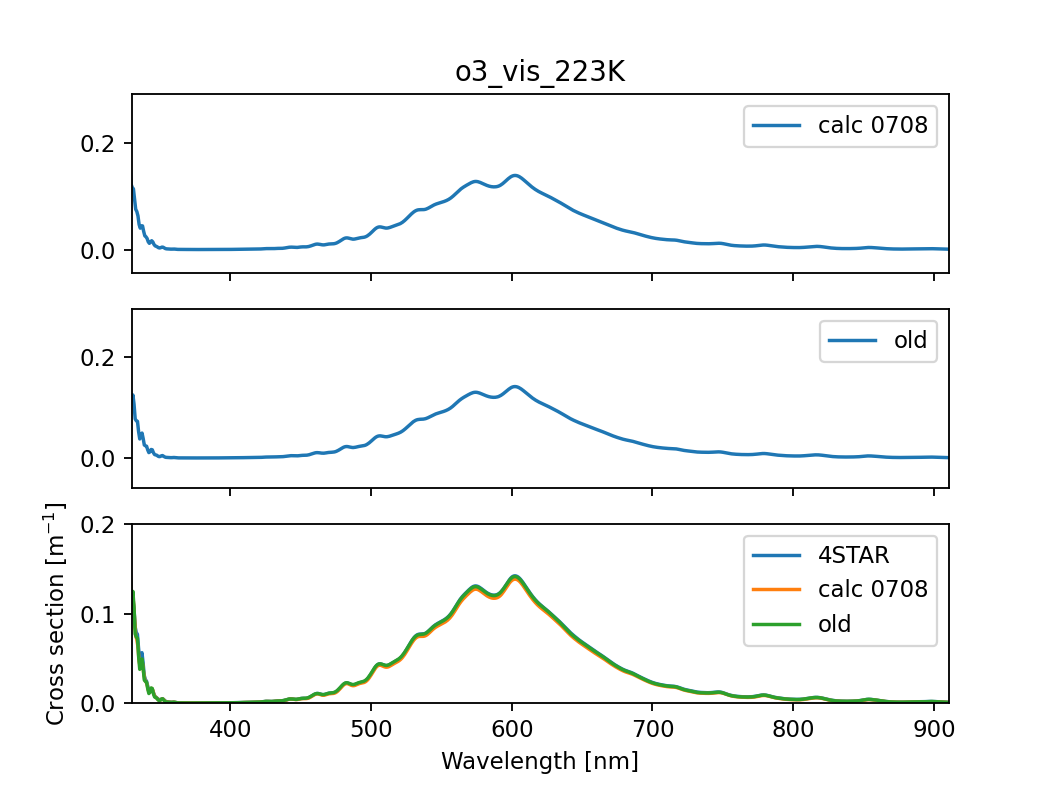

In [62]:
k = 'o3_vis_223K'
fig, ax = plt.subplots(3,1,sharex=True)

#ax[0].plot(wvn_2_wvl(gas[k]['nu'][0,0][0,:])*1000.0,gas[k]['coef'][0,0][0,:],label='calc 0513')
ax[0].plot(gases_wln,gases[k]['xs'],label='calc 0708')
ax[1].plot(xs_4starb['wln_4starb'],xs_4starb[k+'_interp'],label='old')
ax[2].plot(xs_4star['wln'],xs_4star['o3'],label='4STAR')
ax[2].plot(gases_wln,gases[k]['xs'],label='calc 0708')
ax[2].plot(xs_4starb['wln_4starb'],xs_4starb[k+'_interp'],label='old')

ax[2].set_ylim(0,0.2)

plt.xlabel('Wavelength [nm]')
plt.ylabel('Cross section [m$^{{-1}}$]')
ax[0].set_title(k)
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [244]:
cross_section_tosave['o3'] = gases['o3_vis_223K']['xs']

o3_notes = ['Ozone cross-section created for 4STARB',
            'Created from FWHM convolution on 2022-07-08, using the HITRAN - API Gaussian slit: hapi.SLIT_GAUSSIAN and numpy.trapz function',
            'Original file from: {}'.format(use_measured_xs['o3_vis_223K']['fname']),
            'Using internal name: o3_vis_223K, for high altitude ozone',
            'Website: http://joseba.mpch-mainz.mpg.de/spectral_atlas_data/cross_sections/Ozone/O3_Serdyuchenko(2014)_223K_213-1100nm(2013%20version).txt',
            'Reference: A. Serdyuchenko, V. Gorshelev, M. Weber, W. Chehade, and J.P. Burrows, High spectral resolution ozone absorption cross-sections –'+\
              ' Part 2: Temperature dependence, Atmos. Meas. Tech. 7, 625-636 (2014); DOI: 10.5194/amt-7-625-2014',
            'units: atm/m (already multiplied by Loschmidt)']
cross_section_tosave['o3_notes'] = np.zeros((len(o3_notes),), dtype=np.object)
cross_section_tosave['o3_notes'][:] = o3_notes

<ipython-input-244-b8b18a8630ed>:10: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cross_section_tosave['o3_notes'] = np.zeros((len(o3_notes),), dtype=np.object)


### NO2

<IPython.core.display.Javascript object>


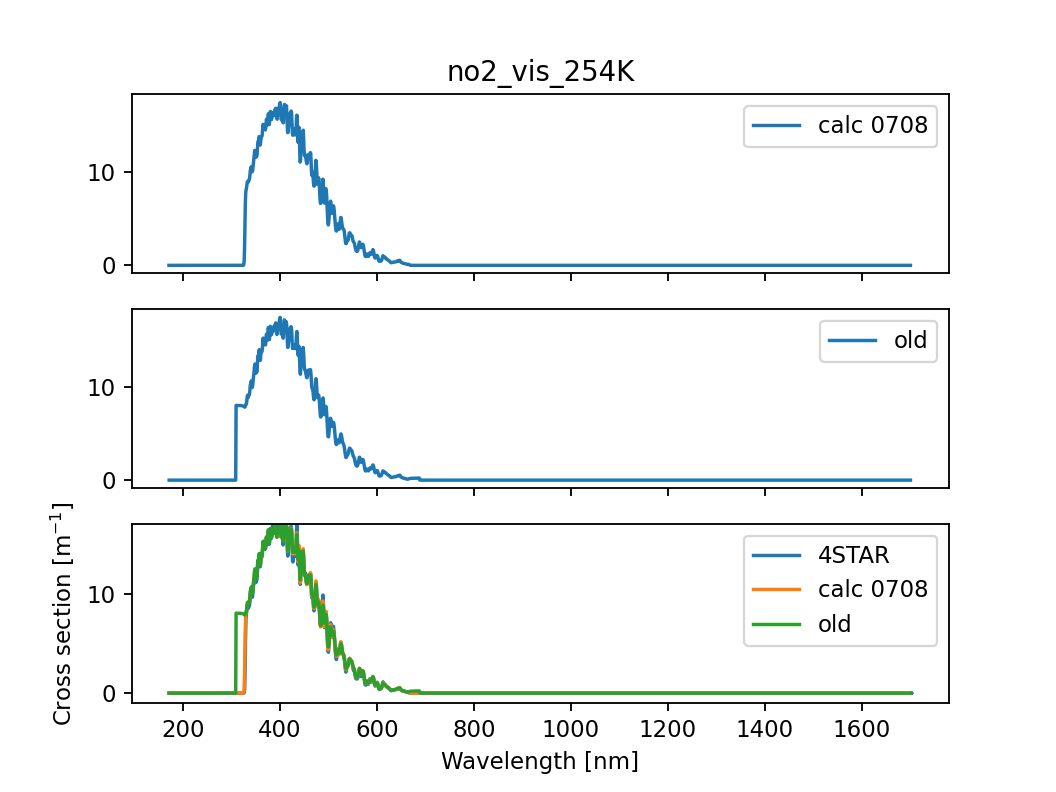

In [63]:
k = 'no2_vis_254K'
fig, ax = plt.subplots(3,1,sharex=True)

#ax[0].plot(wvn_2_wvl(gas[k]['nu'][0,0][0,:])*1000.0,gas[k]['coef'][0,0][0,:],label='calc 0513')
ax[0].plot(gases_wln,gases[k]['xs'],label='calc 0708')
ax[1].plot(xs_4starb['wln_4starb'],xs_4starb[k+'_interp'],label='old')
ax[2].plot(xs_4star['wln'],xs_4star['no2'],label='4STAR')
ax[2].plot(gases_wln,gases[k]['xs'],label='calc 0708')
ax[2].plot(xs_4starb['wln_4starb'],xs_4starb[k+'_interp'],label='old')

ax[2].set_ylim(-1,17)

plt.xlabel('Wavelength [nm]')
plt.ylabel('Cross section [m$^{{-1}}$]')
ax[0].set_title(k)
ax[0].legend()
ax[1].legend()
ax[2].legend()

In [245]:
k = 'no2_vis_254K'
cross_section_tosave['no2'] = gases[k]['xs']

no2_notes = ['NO2 cross-section created for 4STARB',
            'Created from FWHM in wavelength convolution on 2022-07-08, using the HITRAN - '+\
               'API Gaussian slit: hapi.SLIT_GAUSSIAN and numpy.trapz function',
            'Original file from: {}'.format(use_measured_xs[k]['fname']),
            'Using internal name: {}, for high altitude nitrogen'.format(k),
            'Website (Possibly): https://uvvis.mpch-mainz.gwdg.de/uvvis/cross_sections/Nitrogen%20oxides/NO2_Vandaele(2002)_240K_400-725nm(vis-pure).txt',
            'Reference (Possibly): A.C. Vandaele, C. Hermans, S. Fally, M. Carleer, R. Colin, M.-F. Mérienne, and '+\
               'A. Jenouvrier, "High-resolution Fourier transform measurement of the NO2 visible '+\
               'and near-infrared absorption cross-section: Temperature and pressure effects",'+\
               ' J. Geophys. Res. 107(D18), ACH 3-1 - ACH 3-12 (2002); DOI: 10.1029/2001JD000971',
            'Origin from no2_254K.xs file in 4STAR data folder cross sections',
            'units: atm/m (already multiplied by Loschmidt)']
cross_section_tosave['no2_notes'] = np.zeros((len(no2_notes),), dtype=np.object)
cross_section_tosave['no2_notes'][:] = no2_notes

<ipython-input-245-f74d86229bf7>:12: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cross_section_tosave['no2_notes'] = np.zeros((len(no2_notes),), dtype=np.object)


### O2

<IPython.core.display.Javascript object>


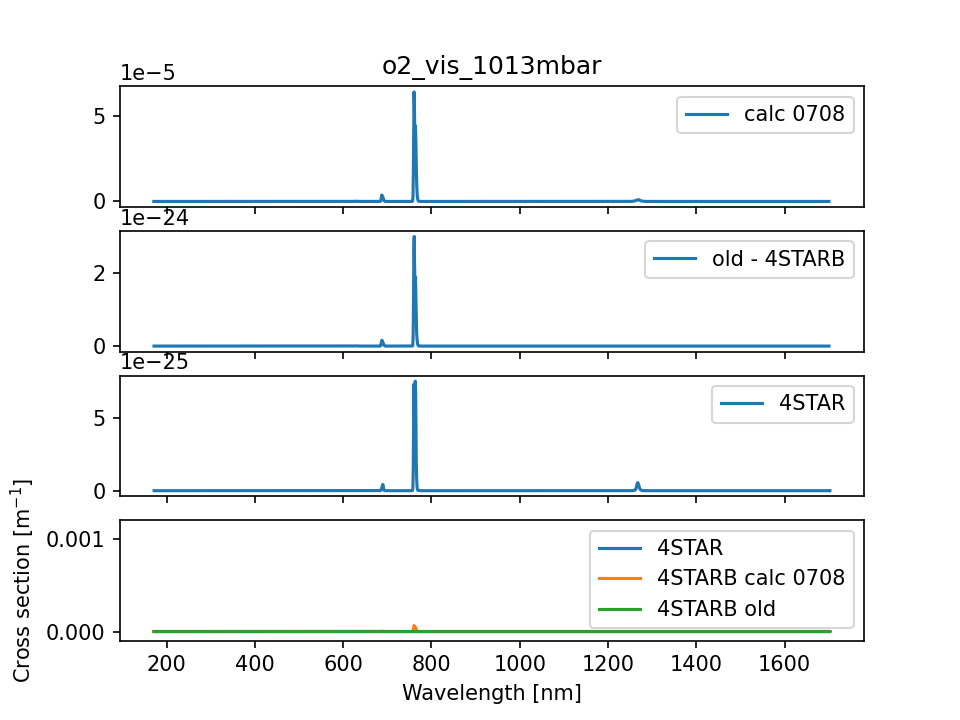

In [238]:
k = 'o2_vis_1013mbar'
fig, ax = plt.subplots(4,1,sharex=True)

#ax[0].plot(wvn_2_wvl(gas[k]['nu'][0,0][0,:])*1000.0,gas[k]['coef'][0,0][0,:],label='calc 0513')
ax[0].plot(gases_wln,gases[k]['xs'],label='calc 0708')
ax[1].plot(xs_4starb['wln_4starb'],xs_4starb[k+'_interp'],label='old - 4STARB')
ax[2].plot(xs_4star['wln'],xs_4star['o2'],label='4STAR')

ax[3].plot(xs_4star['wln'],xs_4star['o2'],label='4STAR')
ax[3].plot(gases_wln,gases[k]['xs'],label='4STARB calc 0708')
ax[3].plot(xs_4starb['wln_4starb'],xs_4starb[k+'_interp'],label='4STARB old')

ax[3].set_ylim(-0.0001,0.0012)

plt.xlabel('Wavelength [nm]')
plt.ylabel('Cross section [m$^{{-1}}$]')
ax[0].set_title(k)
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

In [255]:
k = 'o2_vis_1013mbar'
cross_section_tosave['o2'] = gases[k]['xs']

o2_notes = ['O2 cross-section created for 4STARB',
            'Created from FWHM in wavelength convolution on 2022-07-08'+\
               ', using the HITRAN - API Gaussian slit: hapi.SLIT_GAUSSIAN and numpy.trapz function',
            'Using the HITRAN API for Python HAPI, based on the lines emnissions'+\
               ' and a Voigt profile for temp: {}K and press: {}atm'.format(
                gases[k]['Environment']['T'][0],gases[k]['Environment']['p'][0]),
            'Using internal name: {}, for low altitude oxygen'.format(k),
            'Website: https://hitran.org/hapi/',
            'Reference: Gordon, I.E., Rothman, L.S., Hargreaves, R.J., et al.'+\
              ' The HITRAN2020 molecular spectroscopic database. J. Quant. Spectrosc. Radiat. Transf. 277, 107949 (2022)'+\
              ' doi:10.1016/j.jqsrt.2021.107949.',
            'units: atm/m (already multiplied by Loschmidt)']
cross_section_tosave['o2_notes'] = np.zeros((len(o2_notes),), dtype=np.object)
cross_section_tosave['o2_notes'][:] = o2_notes

<ipython-input-255-f5dab4826c66>:16: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cross_section_tosave['o2_notes'] = np.zeros((len(o2_notes),), dtype=np.object)


### O4

<IPython.core.display.Javascript object>


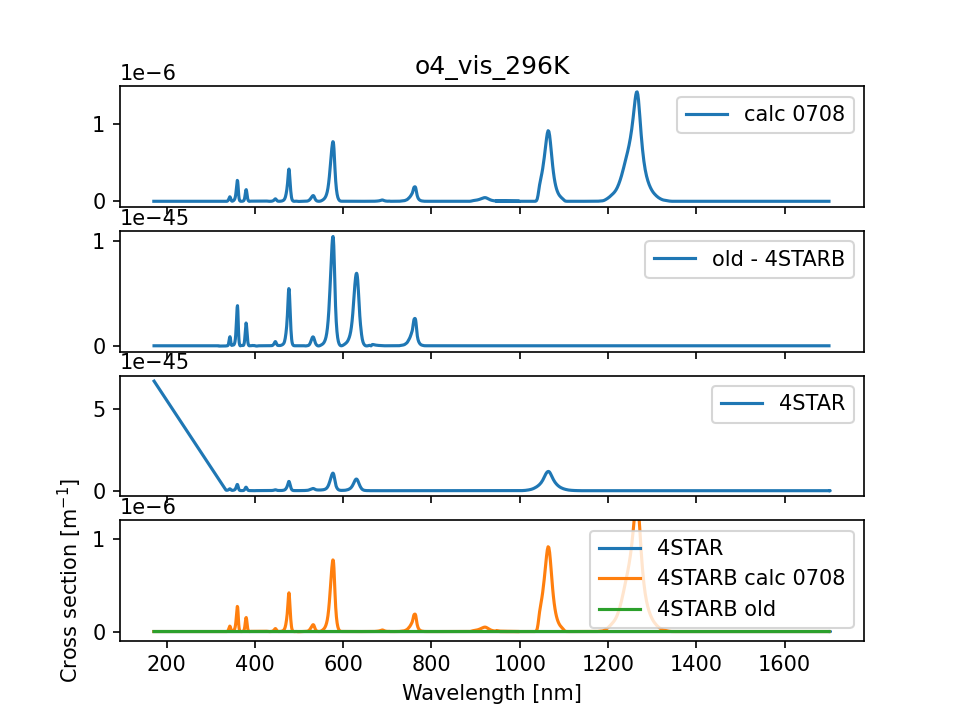

In [260]:
k = 'o4_vis_296K'
fig, ax = plt.subplots(4,1,sharex=True)

#ax[0].plot(wvn_2_wvl(gas[k]['nu'][0,0][0,:])*1000.0,gas[k]['coef'][0,0][0,:],label='calc 0513')
ax[0].plot(gases_wln,gases[k]['xs'],label='calc 0708')
ax[1].plot(xs_4starb['wln_4starb'],xs_4starb[k+'_interp'],label='old - 4STARB')
ax[2].plot(xs_4star['wln'],xs_4star['o4'],label='4STAR')

ax[3].plot(xs_4star['wln'],xs_4star['o4'],label='4STAR')
ax[3].plot(gases_wln,gases[k]['xs'],label='4STARB calc 0708')
ax[3].plot(xs_4starb['wln_4starb'],xs_4starb[k+'_interp'],label='4STARB old')

ax[3].set_ylim(-0.0000001,0.0000012)

plt.xlabel('Wavelength [nm]')
plt.ylabel('Cross section [m$^{{-1}}$]')
ax[0].set_title(k)
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

In [302]:
k = 'o4_vis_296K'
cross_section_tosave['o4'] = gases[k]['xs']

o4_notes = ['O2-O2 cross-section created for 4STARB',
            'Created from FWHM in wavelength convolution on 2022-07-08'+\
               ', using the HITRAN - API Gaussian slit: hapi.SLIT_GAUSSIAN and numpy.trapz function',
            'Original file from: {}'.format(use_measured_xs[k]['fname']),
            'Using internal name: {}, for Oxygen-Oxygen transitions at 293K to 297.8K for atmospheric pressure up to 4atm '.format(k),
            'Website: hhttps://hitran.org/data/CIA/O2-O2_2018b.cia',
            'Reference: T. Karman, I. E. Gordon, A. van der Avoird, Y. I. Baranov, C. Boulet, '+\
               'B. J. Drouin, et al., "Update of the HITRAN collision-induced absorption section", Icarus 328, 160 (2019)',
            'units: atm/m (already multiplied by Loschmidt*2)']
cross_section_tosave['o4_notes'] = np.zeros((len(o4_notes),), dtype=np.object)
cross_section_tosave['o4_notes'][:] = o4_notes

<ipython-input-302-cd4ada3e8673>:13: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cross_section_tosave['o4_notes'] = np.zeros((len(o4_notes),), dtype=np.object)


### CO2

<IPython.core.display.Javascript object>


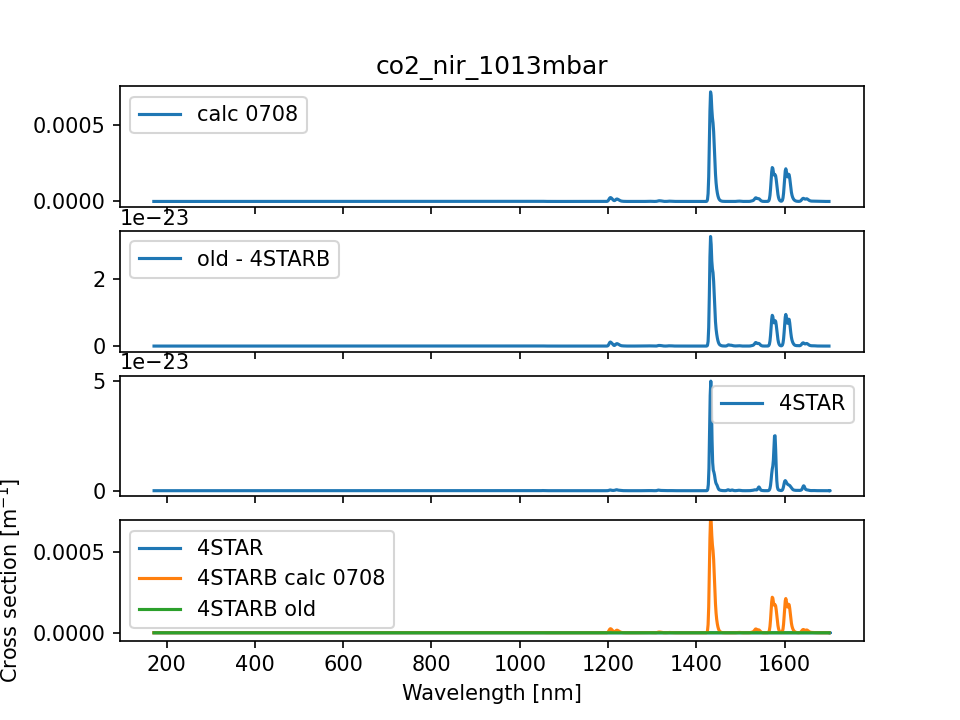

In [281]:
k = 'co2_nir_1013mbar'
fig, ax = plt.subplots(4,1,sharex=True)

#ax[0].plot(wvn_2_wvl(gas[k]['nu'][0,0][0,:])*1000.0,gas[k]['coef'][0,0][0,:],label='calc 0513')
ax[0].plot(gases_wln,gases[k]['xs'],label='calc 0708')
ax[1].plot(xs_4starb['wln_4starb'],xs_4starb[k+'_interp'],label='old - 4STARB')
ax[2].plot(xs_4star['wln'],xs_4star['co2'],label='4STAR')

ax[3].plot(xs_4star['wln'],xs_4star['co2'],label='4STAR')
ax[3].plot(gases_wln,gases[k]['xs'],label='4STARB calc 0708')
ax[3].plot(xs_4starb['wln_4starb'],xs_4starb[k+'_interp'],label='4STARB old')

ax[3].set_ylim(-0.00005,0.0007)

plt.xlabel('Wavelength [nm]')
plt.ylabel('Cross section [m$^{{-1}}$]')
ax[0].set_title(k)
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()

In [282]:
k = 'co2_nir_1013mbar'
cross_section_tosave['co2'] = gases[k]['xs']

co2_notes = ['CO2 cross-section created for 4STARB',
            'Created from FWHM in wavelength convolution on 2022-07-08'+\
               ', using the HITRAN - API Gaussian slit: hapi.SLIT_GAUSSIAN and numpy.trapz function',
            'Using the HITRAN API for Python HAPI, based on the lines emnissions'+\
               ' and a Voigt profile for temp: {}K and press: {}atm'.format(
                gases[k]['Environment']['T'][0],gases[k]['Environment']['p'][0]),
            'Using internal name: {}, for low altitude CO2'.format(k),
            'Website: https://hitran.org/hapi/',
            'Reference: Gordon, I.E., Rothman, L.S., Hargreaves, R.J., et al.'+\
              ' The HITRAN2020 molecular spectroscopic database. J. Quant. Spectrosc. Radiat. Transf. 277, 107949 (2022)'+\
              ' doi:10.1016/j.jqsrt.2021.107949.',
            'units: atm/m (already multiplied by Loschmidt)']
cross_section_tosave['co2_notes'] = np.zeros((len(co2_notes),), dtype=np.object)
cross_section_tosave['co2_notes'][:] = co2_notes

<ipython-input-282-737edf8ff5a0>:16: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cross_section_tosave['co2_notes'] = np.zeros((len(co2_notes),), dtype=np.object)


### CH4

<IPython.core.display.Javascript object>


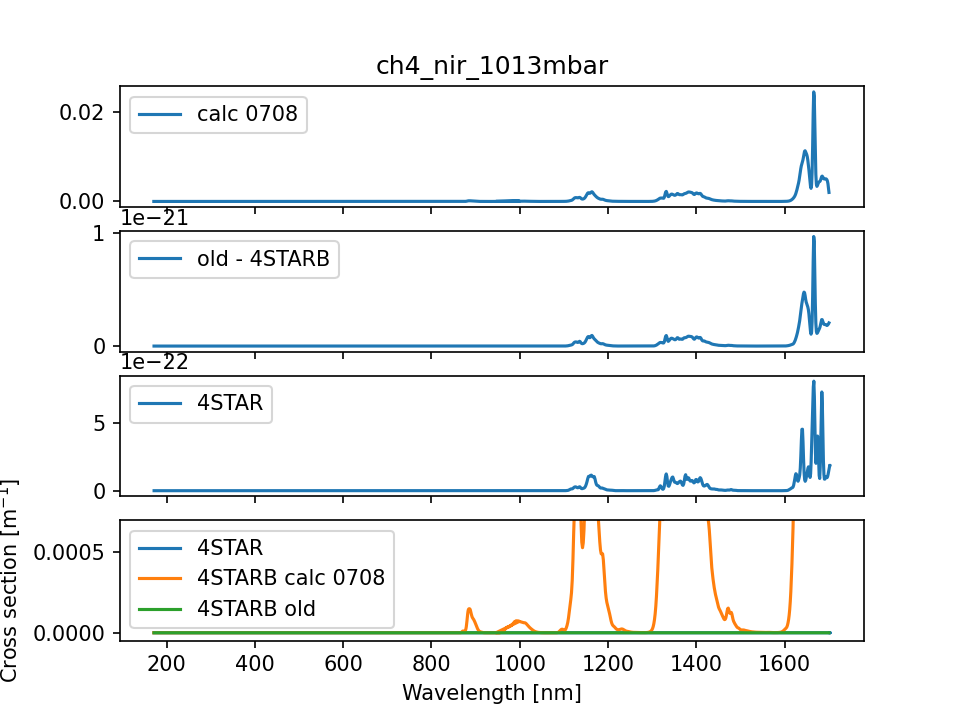

In [283]:
k = 'ch4_nir_1013mbar'
fig, ax = plt.subplots(4,1,sharex=True)

#ax[0].plot(wvn_2_wvl(gas[k]['nu'][0,0][0,:])*1000.0,gas[k]['coef'][0,0][0,:],label='calc 0513')
ax[0].plot(gases_wln,gases[k]['xs'],label='calc 0708')
ax[1].plot(xs_4starb['wln_4starb'],xs_4starb[k+'_interp'],label='old - 4STARB')
ax[2].plot(xs_4star['wln'],xs_4star['ch4'],label='4STAR')

ax[3].plot(xs_4star['wln'],xs_4star['ch4'],label='4STAR')
ax[3].plot(gases_wln,gases[k]['xs'],label='4STARB calc 0708')
ax[3].plot(xs_4starb['wln_4starb'],xs_4starb[k+'_interp'],label='4STARB old')

ax[3].set_ylim(-0.00005,0.0007)

plt.xlabel('Wavelength [nm]')
plt.ylabel('Cross section [m$^{{-1}}$]')
ax[0].set_title(k)
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend() 

In [284]:
k = 'ch4_nir_1013mbar'
cross_section_tosave['ch4'] = gases[k]['xs']

ch4_notes = ['CH4 cross-section created for 4STARB',
            'Created from FWHM in wavelength convolution on 2022-07-08'+\
               ', using the HITRAN - API Gaussian slit: hapi.SLIT_GAUSSIAN and numpy.trapz function',
            'Using the HITRAN API for Python HAPI, based on the lines emnissions'+\
               ' and a Voigt profile for temp: {}K and press: {}atm'.format(
                gases[k]['Environment']['T'][0],gases[k]['Environment']['p'][0]),
            'Using internal name: {}, for low altitude CH4'.format(k),
            'Website: https://hitran.org/hapi/',
            'Reference: Gordon, I.E., Rothman, L.S., Hargreaves, R.J., et al.'+\
              ' The HITRAN2020 molecular spectroscopic database. J. Quant. Spectrosc. Radiat. Transf. 277, 107949 (2022)'+\
              ' doi:10.1016/j.jqsrt.2021.107949.',
            'units: atm/m (already multiplied by Loschmidt)']
cross_section_tosave['ch4_notes'] = np.zeros((len(ch4_notes),), dtype=np.object)
cross_section_tosave['ch4_notes'][:] = ch4_notes

<ipython-input-284-81833f6040f5>:16: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cross_section_tosave['ch4_notes'] = np.zeros((len(ch4_notes),), dtype=np.object)


### H2O

<IPython.core.display.Javascript object>


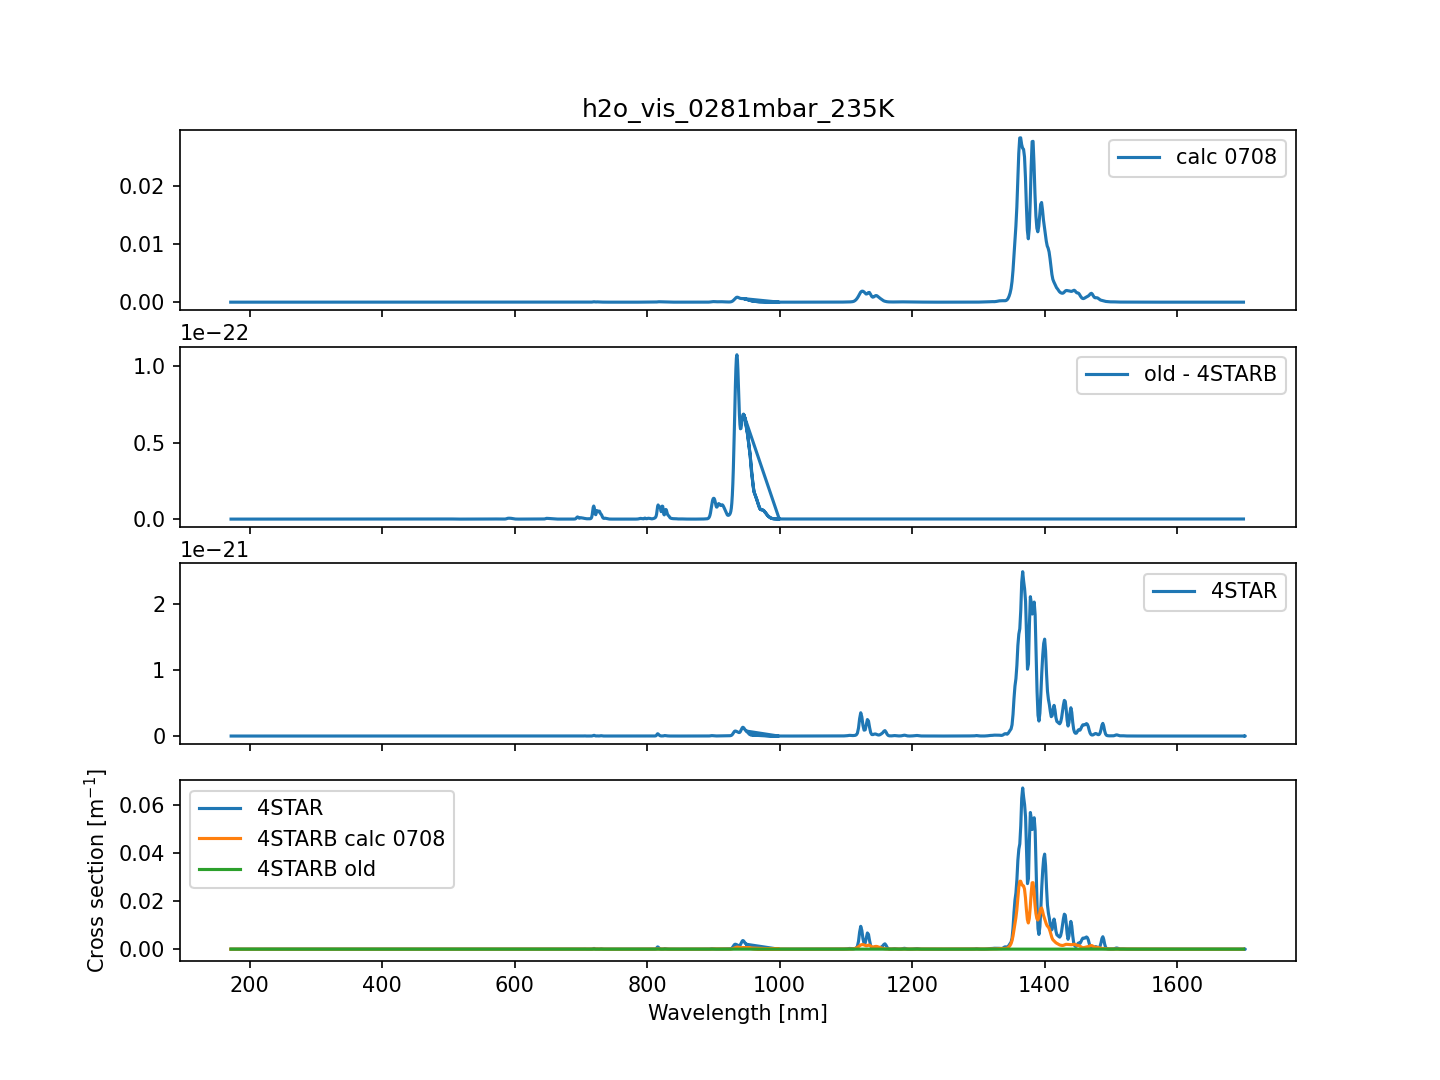

In [293]:
k = 'h2o_vis_1013mbar_294K'
fig, ax = plt.subplots(4,1,sharex=True)

#ax[0].plot(wvn_2_wvl(gas[k]['nu'][0,0][0,:])*1000.0,gas[k]['coef'][0,0][0,:],label='calc 0513')
ax[0].plot(gases_wln,gases[k]['xs'],label='calc 0708')
ax[1].plot(xs_4starb['wln_4starb'],xs_4starb[k+'_interp'],label='old - 4STARB')
ax[2].plot(xs_4star['wln'],xs_4star['h2o'],label='4STAR')

ax[3].plot(xs_4star['wln'],xs_4star['h2o']*Loschmidt,label='4STAR')
ax[3].plot(gases_wln,gases[k]['xs'],label='4STARB calc 0708')
ax[3].plot(xs_4starb['wln_4starb'],xs_4starb[k+'_interp'],label='4STARB old')

ax[3].set_ylim(-0.005,0.07)

plt.xlabel('Wavelength [nm]')
plt.ylabel('Cross section [m$^{{-1}}$]')
ax[0].set_title(k)
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend() 

In [296]:
k = 'h2o_vis_1013mbar_294K'
cross_section_tosave['h2o'] = gases[k]['xs']

h2o_notes = ['H2O cross-section created for 4STARB',
            'Created from FWHM in wavelength convolution on 2022-07-08'+\
               ', using the HITRAN - API Gaussian slit: hapi.SLIT_GAUSSIAN and numpy.trapz function',
            'Using the HITRAN API for Python HAPI, based on the lines emnissions'+\
               ' and a Voigt profile for temp: {}K and press: {}atm'.format(
                gases[k]['Environment']['T'][0],gases[k]['Environment']['p'][0]),
            'Using internal name: {}, for low altitude H2O'.format(k),
            'Website: https://hitran.org/hapi/',
            'Reference: Gordon, I.E., Rothman, L.S., Hargreaves, R.J., et al.'+\
              ' The HITRAN2020 molecular spectroscopic database. J. Quant. Spectrosc. Radiat. Transf. 277, 107949 (2022)'+\
              ' doi:10.1016/j.jqsrt.2021.107949.',
            'units: atm/m (already multiplied by Loschmidt)']
cross_section_tosave['h2o_notes'] = np.zeros((len(h2o_notes),), dtype=np.object)
cross_section_tosave['h2o_notes'][:] = h2o_notes

<ipython-input-296-4e4cde1873d9>:16: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cross_section_tosave['h2o_notes'] = np.zeros((len(h2o_notes),), dtype=np.object)


In [297]:
for k in gases.keys():
    if k.startswith('h2o'):
        print(k)
        
        cross_section_tosave[k] = gases[k]['xs']
        h2o_notes = ['H2O cross-section created for 4STARB',
            'Created from FWHM in wavelength convolution on 2022-07-08'+\
               ', using the HITRAN - API Gaussian slit: hapi.SLIT_GAUSSIAN and numpy.trapz function',
            'Using the HITRAN API for Python HAPI, based on the lines emnissions'+\
               ' and a Voigt profile for temp: {}K and press: {}atm'.format(
                gases[k]['Environment']['T'][0],gases[k]['Environment']['p'][0]),
            'Using internal name: {}, for low altitude CH4'.format(k),
            'Website: https://hitran.org/hapi/',
            'Reference: Gordon, I.E., Rothman, L.S., Hargreaves, R.J., et al.'+\
              ' The HITRAN2020 molecular spectroscopic database. J. Quant. Spectrosc. Radiat. Transf. 277, 107949 (2022)'+\
              ' doi:10.1016/j.jqsrt.2021.107949.',
            'units: atm/m (already multiplied by Loschmidt)']
        cross_section_tosave[k+'_notes'] = np.zeros((len(h2o_notes),), dtype=np.object)
        cross_section_tosave[k+'_notes'][:] = h2o_notes

h2o_vis_1013mbar_294K
h2o_vis_0902mbar_289K
h2o_vis_0802mbar_285K
h2o_vis_0710mbar_279K
h2o_vis_0628mbar_273K
h2o_vis_0554mbar_267K
h2o_vis_0487mbar_261K
h2o_vis_0426mbar_254K
h2o_vis_0372mbar_248K
h2o_vis_0324mbar_241K
h2o_vis_0281mbar_235K


<ipython-input-297-3a3a98b39421>:18: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cross_section_tosave[k+'_notes'] = np.zeros((len(h2o_notes),), dtype=np.object)


## Save the 4STARB cross sections

In [305]:
sio.savemat(fp+'cross_sections_4starb_20220708.mat',cross_section_tosave)

In [304]:
cross_section_tosave.keys()

dict_keys(['wln', 'wln_notes', 'o3', 'o3_notes', 'no2', 'no2_notes', 'o2', 'o2_notes', 'o4_notes', 'co2', 'co2_notes', 'ch4', 'ch4_notes', 'h2o', 'h2o_notes', 'h2o_vis_1013mbar_294K', 'h2o_vis_1013mbar_294K_notes', 'h2o_vis_0902mbar_289K', 'h2o_vis_0902mbar_289K_notes', 'h2o_vis_0802mbar_285K', 'h2o_vis_0802mbar_285K_notes', 'h2o_vis_0710mbar_279K', 'h2o_vis_0710mbar_279K_notes', 'h2o_vis_0628mbar_273K', 'h2o_vis_0628mbar_273K_notes', 'h2o_vis_0554mbar_267K', 'h2o_vis_0554mbar_267K_notes', 'h2o_vis_0487mbar_261K', 'h2o_vis_0487mbar_261K_notes', 'h2o_vis_0426mbar_254K', 'h2o_vis_0426mbar_254K_notes', 'h2o_vis_0372mbar_248K', 'h2o_vis_0372mbar_248K_notes', 'h2o_vis_0324mbar_241K', 'h2o_vis_0324mbar_241K_notes', 'h2o_vis_0281mbar_235K', 'h2o_vis_0281mbar_235K_notes', 'o4'])

# Prepare crossections for retrievals

## Save the gxs straight from the convolution

From the GXS file:

gxs = 

  struct with fields:

       Loschmidt: 2.6868e+19
             bro: [1×1 struct]
         brocoef: [1556×1 double]
          brovis: [1044×2 double]
             ch4: [1×1 struct]
         ch4coef: [1556×1 double]
          ch4nir: [1×1 struct]
             co2: [1×1 struct]
         co2coef: [1556×1 double]
          co2nir: [1×1 struct]
          co2vis: [1×1 struct]
         h2ocoef: [1556×1 double]
            hcoh: [1×1 struct]
        hcohcoef: [1556×1 double]
         hcohvis: [1044×2 double]
           innir: 'O4_CIA_296K_nir.xs'
           invis: 'BrO_243K_AIR4star.txt'
             nir: [1×1 struct]
             no2: [1×1 struct]
         no2_220: [1×1 struct]
    no2_220Kcoef: [1556×1 double]
         no2_298: [1×1 struct]
    no2_298Kcoef: [1556×1 double]
         no2coef: [1556×1 double]
     no2coefdiff: [1556×1 double]
          no2vis: [947×2 double]
              o2: [1×1 struct]
          o2coef: [1556×1 double]
           o2nir: [1×1 struct]
           o2vis: [1×1 struct]
              o3: [1×1 struct]
          o3coef: [1556×1 double]
           o3vis: [1044×2 double]
              o4: [1×1 struct]
          o4coef: [1556×1 double]
           o4nir: [1×1 struct]
           o4vis: [1×1 struct]
             vis: [1×1 struct]
           water: [1×1 struct]
        waternir: [1×1 struct]
        watervis: [1×1 struct]


In [55]:
gases.keys()

dict_keys(['no2_vis_220K', 'no2_vis_254K', 'no2_vis_298K', 'o3_vis_223K', 'o3_vis_293K', 'o4_vis_296K', 'o2_vis_1013mbar', 'hcho_vis_293K', 'h2o_vis_1013mbar_294K', 'h2o_vis_0902mbar_289K', 'h2o_vis_0802mbar_285K', 'h2o_vis_0710mbar_279K', 'h2o_vis_0628mbar_273K', 'h2o_vis_0554mbar_267K', 'h2o_vis_0487mbar_261K', 'h2o_vis_0426mbar_254K', 'h2o_vis_0372mbar_248K', 'h2o_vis_0324mbar_241K', 'h2o_vis_0281mbar_235K', 'h2o_nir_1013mbar_294K', 'h2o_nir_0902mbar_289K', 'h2o_nir_0802mbar_285K', 'h2o_nir_0710mbar_279K', 'h2o_nir_0628mbar_273K', 'h2o_nir_0554mbar_267K', 'h2o_nir_0487mbar_261K', 'h2o_nir_0426mbar_254K', 'h2o_nir_0372mbar_248K', 'h2o_nir_0324mbar_241K', 'h2o_nir_0281mbar_235K', 'ch4_nir_1013mbar', 'co2_nir_1013mbar', 'o4_nir_296K', 'h2o_vis_1013mbar_273K', 'h2o_nir_1013mbar_273K', 'bro_298K', 'hcoh_vis_293K'])

In [56]:
gxs = {'Loschmidt': 2.6868e+19,
       'no2_298Kcoef':gases['no2_vis_298K']['xs'],
       'no2coefdiff':gases['no2_vis_298K']['xs']- gases['no2_vis_220K']['xs'],
       'o3coef':gases['o3_vis_223K']['xs'],
       'o4coef':gases['o4_nir_296K']['xs'],
       'no2coef':gases['no2_vis_254K']['xs'],
       'h2ocoef':gases['h2o_vis_1013mbar_273K']['xs']+gases['h2o_nir_1013mbar_273K']['xs'],
       'hcohcoef':gases['hcoh_vis_293K']['xs'],
       'brocoef':gases['bro_298K']['xs']
       }


In [57]:
sio.savemat(fp+'4STARB_20220830_gxs.mat',gxs)

## Verify GXS cross sections

In [ ]:
plt.figure()
plt.plot(gxs['o3coef'])

## Water vapor at multiple pressures/temps

In [307]:
fp

'/home/sam/4STAR_codes/data_folder/'

In [308]:
# load current
h_xs = sio.loadmat(fp+'H2O_cross_section_FWHM_new_spec_all_range_Tropical3400m.mat')
h_xs.keys()

dict_keys(['__header__', '__version__', '__globals__', 'wavelen', 'cs_sort', 'T', 'trans_sort'])

In [309]:
H2Oa = h_xs['cs_sort'][:,0]
H2Ob = h_xs['cs_sort'][:,1]

<IPython.core.display.Javascript object>


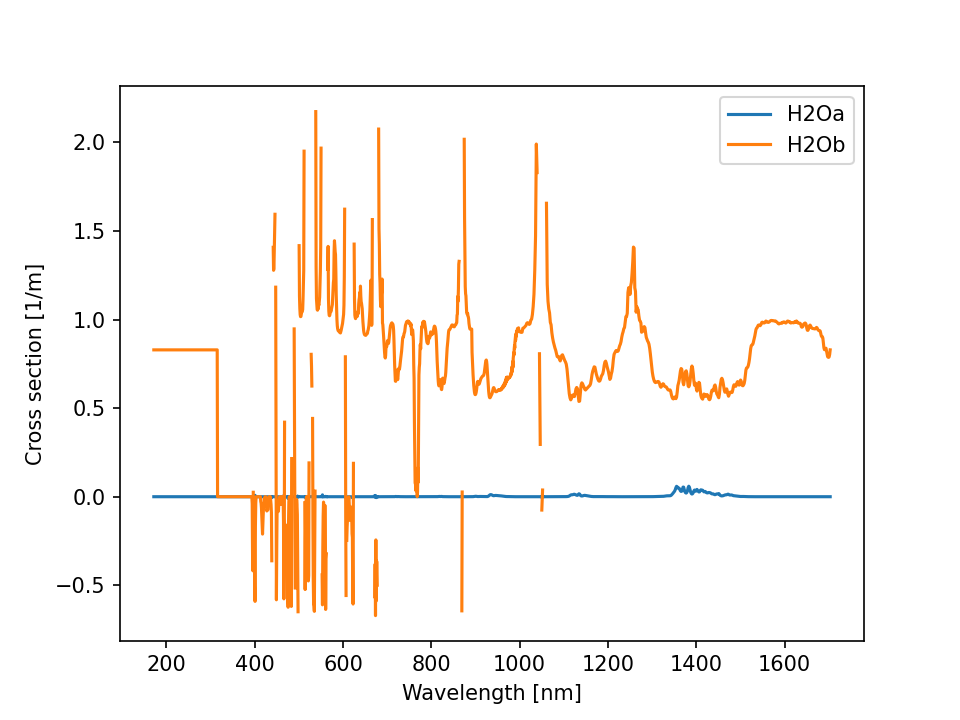

/home/sam/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/sam/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Cross section [1/m]')

In [310]:
plt.figure()
plt.plot(h_xs['wavelen'],H2Oa,label='H2Oa')
plt.plot(h_xs['wavelen'],H2Ob,label='H2Ob')

plt.legend()
plt.xlabel('Wavelength [nm]')
plt.ylabel('Cross section [1/m]')

In [311]:
f_h = ['H2O_cross_section_FWHM_new_spec_all_range_midLatwsum0m.mat',
        'H2O_cross_section_FWHM_new_spec_all_range_midLatwsum1000m.mat',
        'H2O_cross_section_FWHM_new_spec_all_range_midLatwsum2000m.mat',
        'H2O_cross_section_FWHM_new_spec_all_range_midLatwsum3000m.mat',
        'H2O_cross_section_FWHM_new_spec_all_range_midLatwsum4000m.mat',
        'H2O_cross_section_FWHM_new_spec_all_range_midLatwsum5000m.mat',
        'H2O_cross_section_FWHM_new_spec_all_range_midLatwsum6000m.mat',
        'H2O_cross_section_FWHM_new_spec_all_range_midLatSummer7000m.mat',
        'H2O_cross_section_FWHM_new_spec_all_range_midLatSummer8000m.mat',
        'H2O_cross_section_FWHM_new_spec_all_range_midLatSummer9000m.mat',
        'H2O_cross_section_FWHM_new_spec_all_range_midLatSummer10000m.mat',
        'H2O_cross_section_FWHM_new_spec_all_range_midLatSummer11000m.mat',
        'H2O_cross_section_FWHM_new_spec_all_range_midLatSummer12000m.mat',
        'H2O_cross_section_FWHM_new_spec_all_range_midLatSummer13000m.mat',
        'H2O_cross_section_FWHM_new_spec_all_range_midLatSummer14000m.mat']
alts = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000,12000,13000,14000]

In [313]:
h_xss = []
H2Oas = []
H2Obs = []
for ff in f_h:
    h_xss.append(sio.loadmat(fp+ff))
    H2Oas.append(h_xss[-1]['cs_sort'][:,0])
    H2Obs.append(h_xss[-1]['cs_sort'][:,1])

<IPython.core.display.Javascript object>


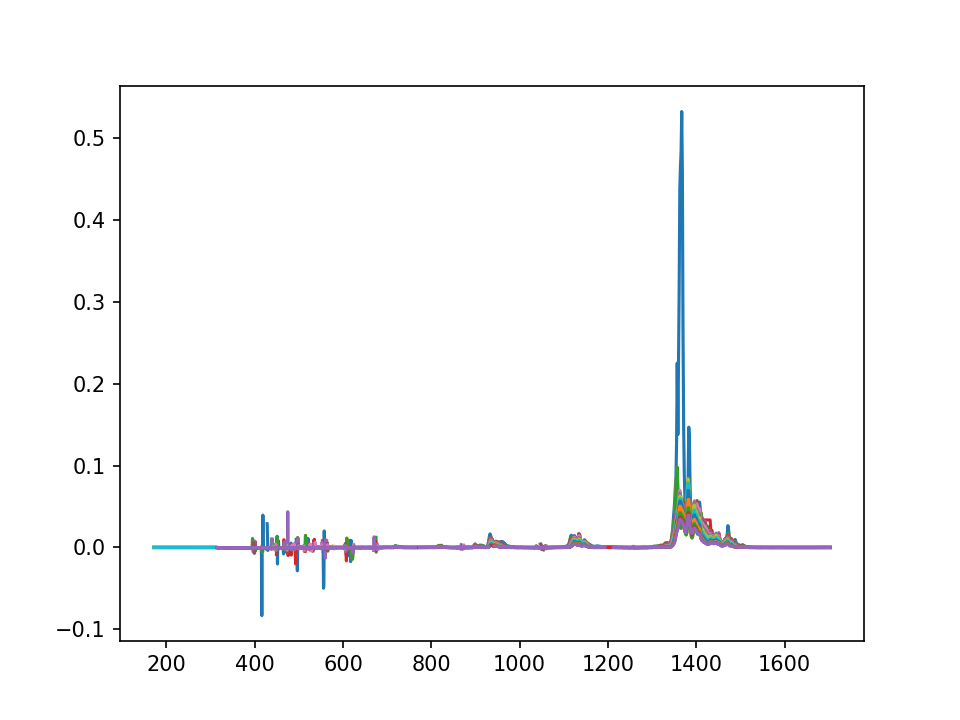

/home/sam/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/sam/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/sam/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/sam/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/sam/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/home/sam/

In [314]:
plt.figure()
for hh in H2Oas:
    plt.plot(h_xss[0]['wavelen'],hh)